# Exploratory Data Analysis and Visualisations

In this notebook, the data is explored visually and analytically. In a series of histograms, boxplots and scatterplots, the relationships between the different variables - primarily the target variable (sales) and the remaining explanatory (independent) variables - are examined. 

The main reason for establishing relationships between sales and the independent variables is to ensure that the latter have a potential influence on sales. For instance, weekend days might have a higher impact on sales than regular workdays. If that is the case, then including that variable in the forecasting model will make for better predictions. 

Furthermore, examining explanatory variables amongst themselves might reveal multicollinearities. This is especially problematic for regression models because the model won't  know to which variable it should attribute the effect on sales. The result is most likely an inaccurate prediction.

Finally, examining histograms of the target variable reveals their distribution. A normal distribution is important for linear regression models, but plays less of a role in tree-based models. 

The relationships between variables are ultimately tested via:

* ANOVA tests (p-value) for continuous (target) and categorical (explanatory) variables
* Pearson Correlations when both variables are continuous

## Loading libraries and data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [2]:
%run functions_vis.py
%run functions_EDA.py

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
d = pd.read_csv("data/train_df.csv")

In [12]:
d = d.sort_values(["store_name","item_category","date"])

#### Converting "date" to datetime 

In [13]:
d['date'] = pd.to_datetime(d['date'])

## Visualizations

### Histograms of Daily Sales

The histograms below show the distribution of daily sales per year and per store. The graphs generally follow a Poisson distribution, meaning that there were many days with fewer sales and few days with high sales. This is generally not an issue for ensemble-based algorithms, such as random forests or gradient boosting models, but might pose a problem for a linear regression.

What is also apparent is the shift towards more frequent higher daily sales over the years. That is especially true for the stores that have been around for longer. This means that these stores tend to sell more items on a daily basis compared to the previous year. The time series linegraph below makes this more evident, showing an overall increase in daily sales over the years.

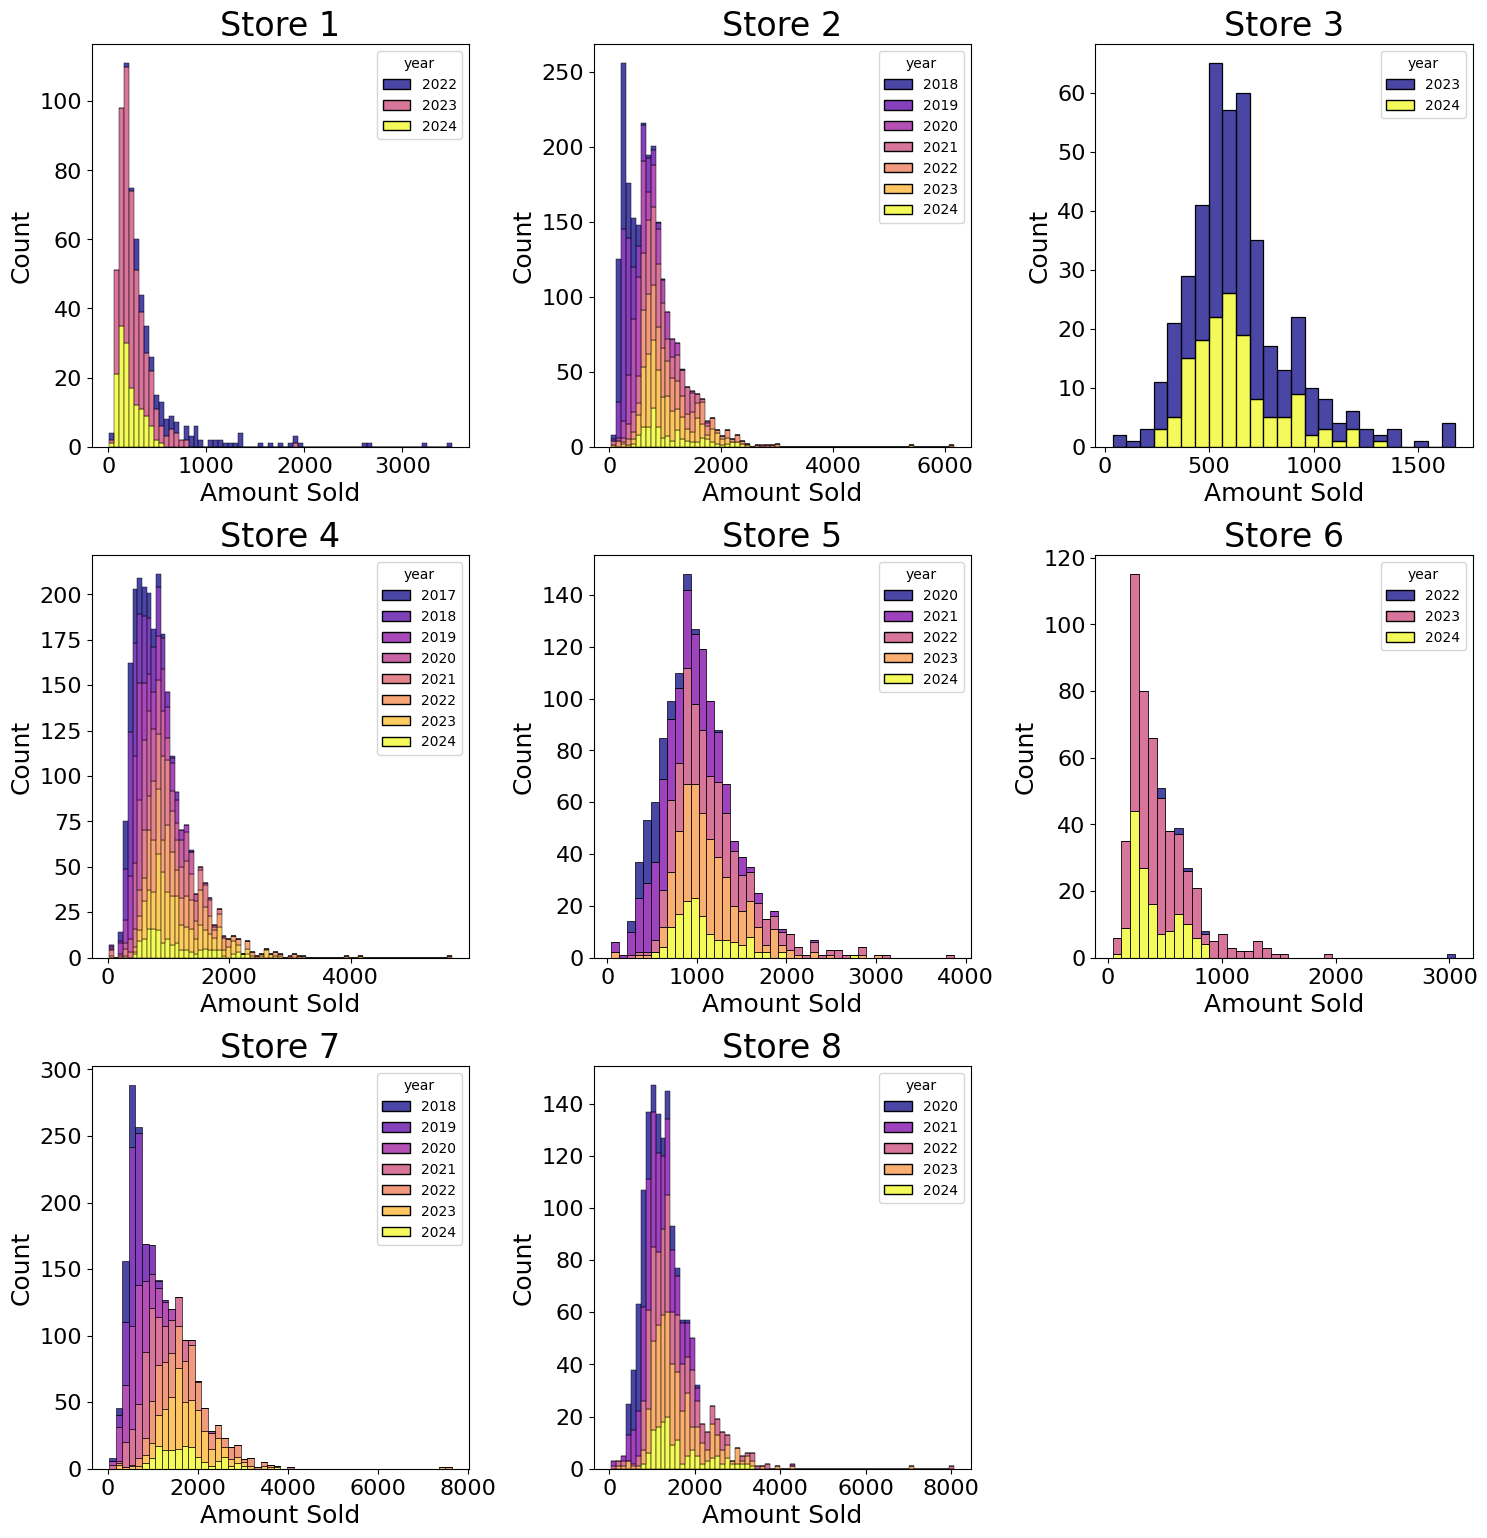

In [14]:
vis_total_amount_hist(d)

In [15]:
d[(d["item_category"] == "daily total")].groupby("store_name")["total_amount"].mean()

store_name
Altona            333.511667
Danziger          749.988933
Jungfernstieg     642.007177
Maybachufer       875.167339
Mitte            1022.347534
Neuer Kamp        447.756286
Potsdamer        1154.831798
Warschauer       1362.142361
Name: total_amount, dtype: float64

## Time series 

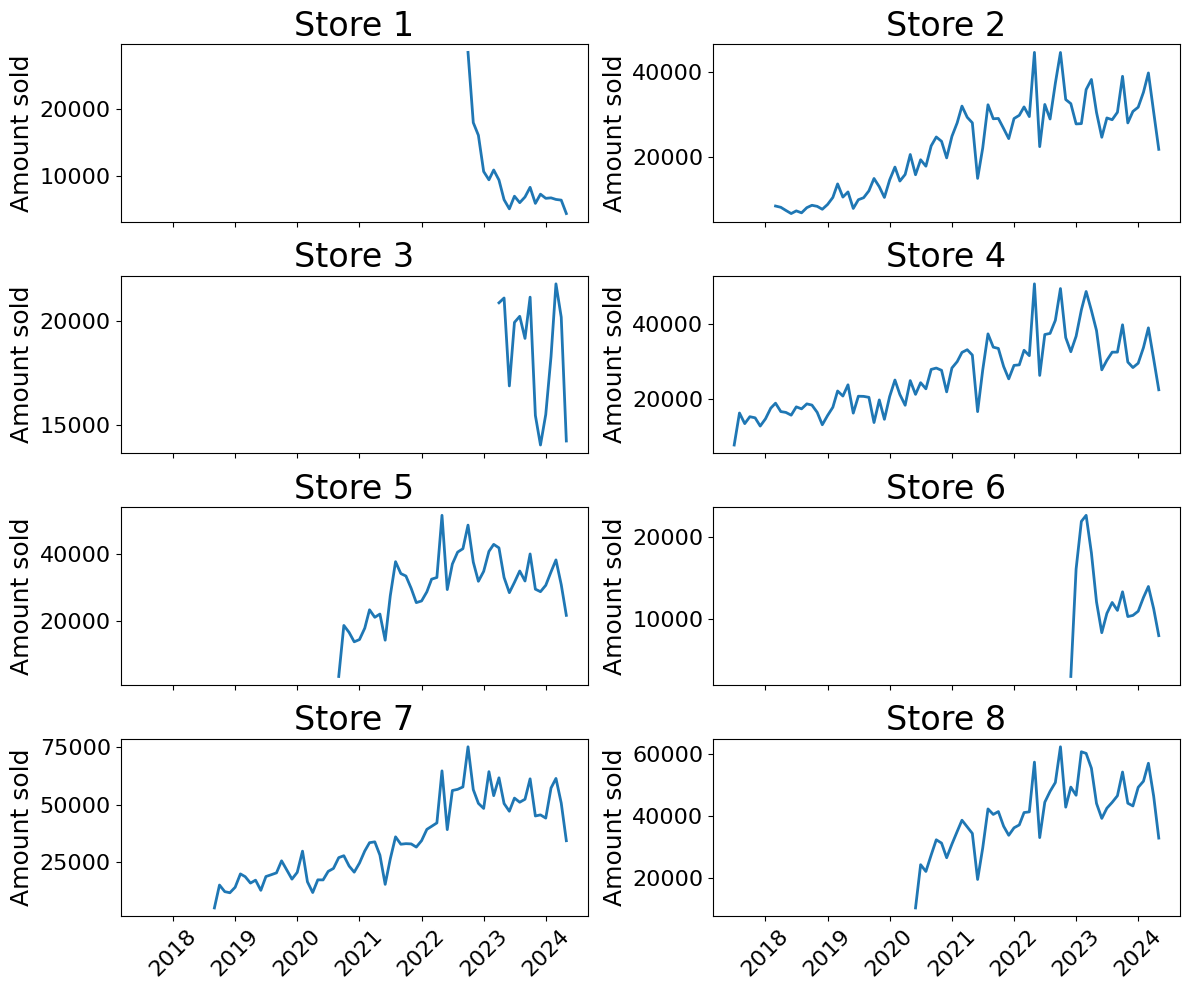

In [16]:
ts_lineplot(d)

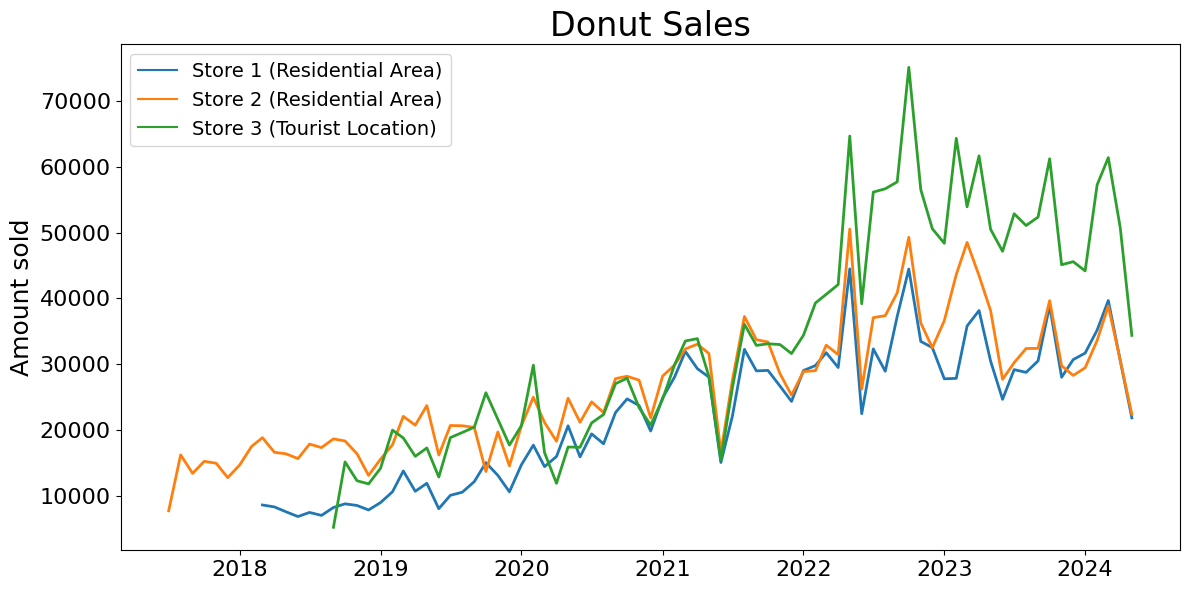

In [9]:
ts_lineplot_stacked(d)

# Branch 1 = Danziger
# Branch 2 = Maybachufer
# Branch 3 = Potsdamer

Disregrading some of the stores that haven't been operating long enough (stores 1, 3 and 6), there is a clear upwards sales trend from year to year. Few more things are noticable in the graphs:

* The steady increase in sales continued during the COVID pandemic, but experienced a slump in the summer of 2021. After lockdown restrictions were loosened in early 2022, there seems to have been a stark increase in sales beginning early that year. By the end of the year, sales decreased almost across the board. This was presumably due to the "hype" toning down.

* Some seasonal trends are evident. There was a large decrease in sales every summer, especially in 2021. While the causes are not clear, it might be because of competing products, such as ice cream, coming into play. In two first and last few month of the year, sales tend to peak. This may have to do with holidays, but also special events such as Valentine's Day or Halloween.

## Weather data

### Rainfall

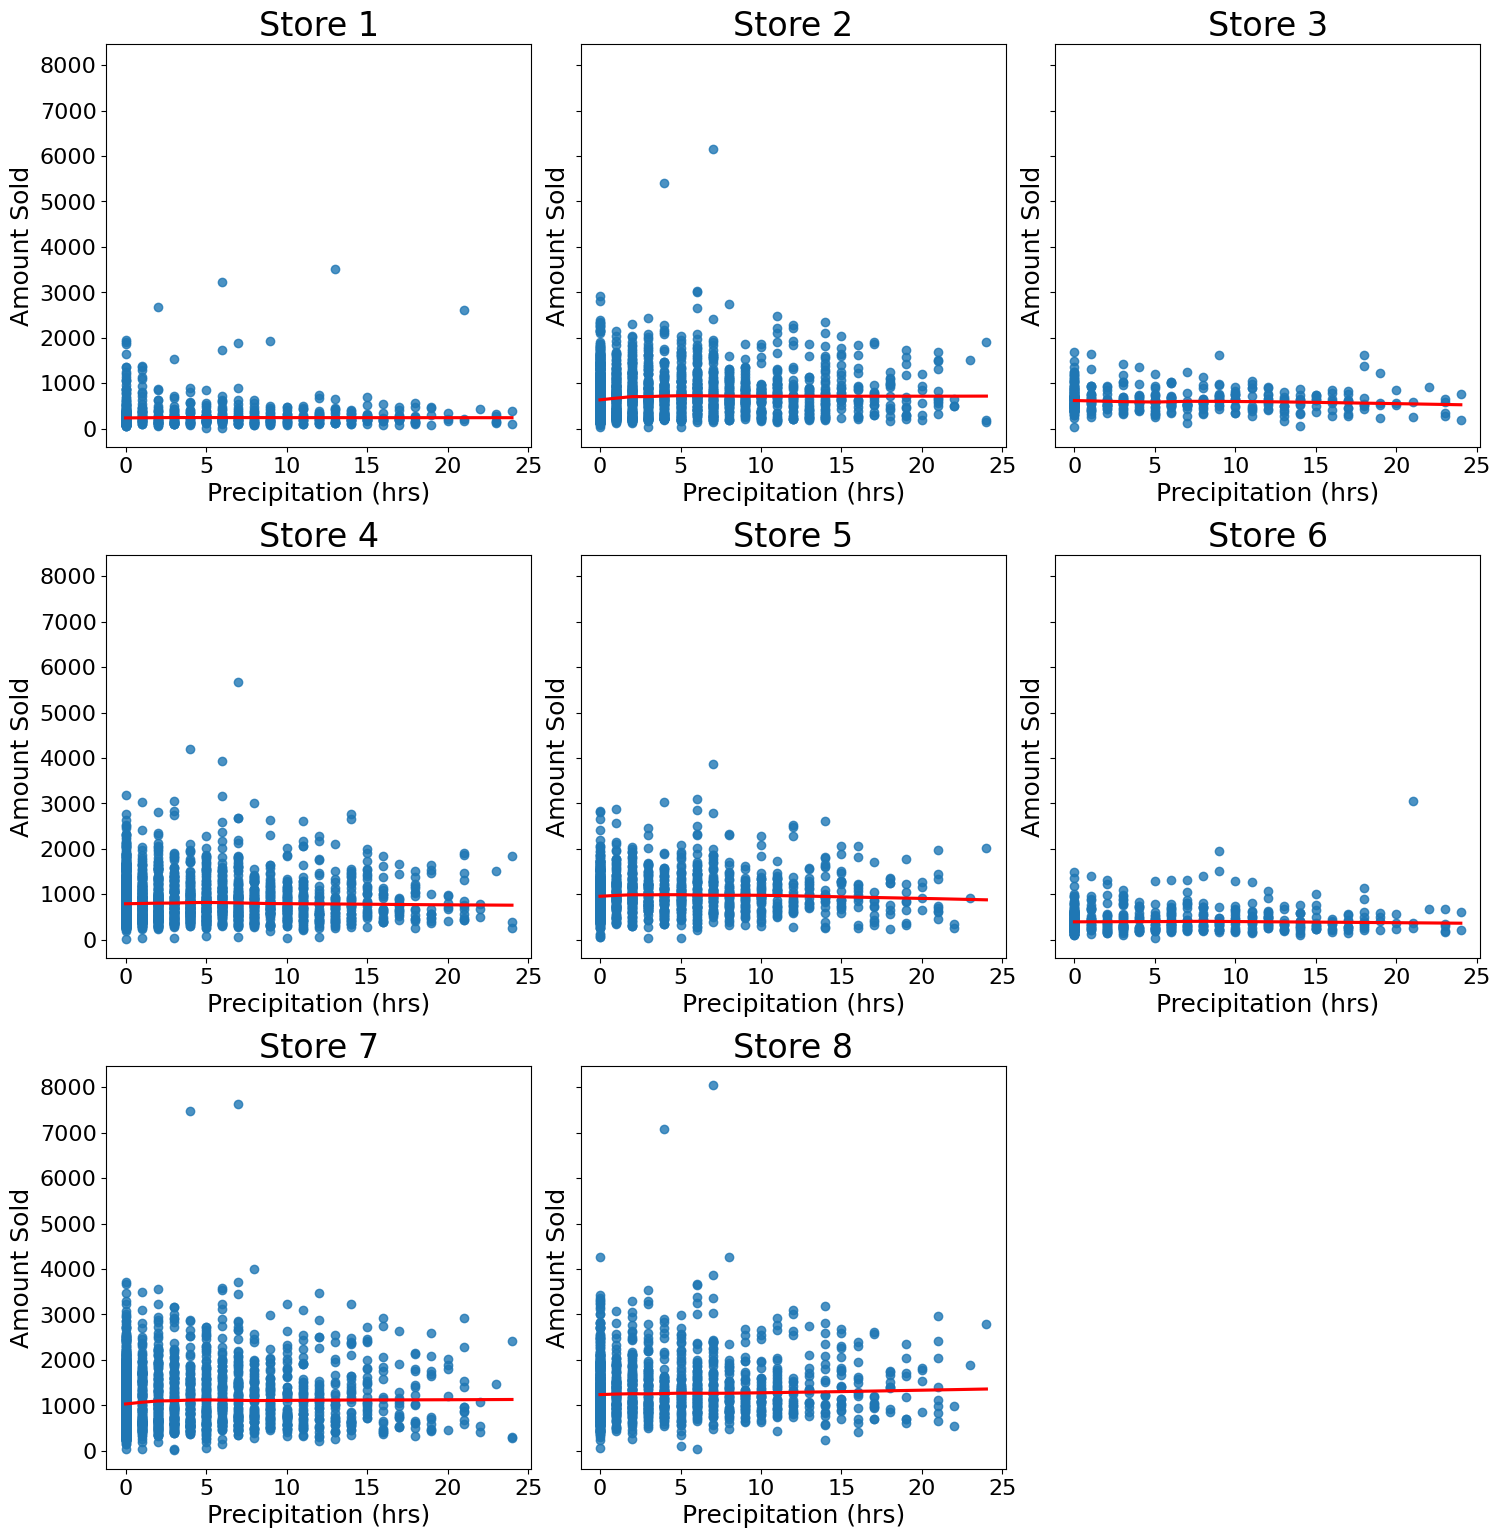

In [17]:
vis_rain(d)

In [18]:
corr_total_amount_by_store(d, "precipitation_hours")

precipitation_hours 

Altona:  -0.06
Danziger:  0.07
Jungfernstieg:  -0.09
Maybachufer:  0.01
Mitte:  0.02
Neuer Kamp:  0.03
Potsdamer:  0.05
Warschauer:  0.06


The relationship between rainfall and total daily sales does not seem to be very strong. However, a simple correlation does not take into account the distribution of daily precipitation evident on the graph. Almost all across the board, days with little to no precipitation have the widest range with respect to the amount of daily donut sales. In other words, when it rains most day, sales tend to be consistently lower. On the other hand, days with the highest sales occur almost exclusively when it doesn't rain for more than 5 - 7 hours.

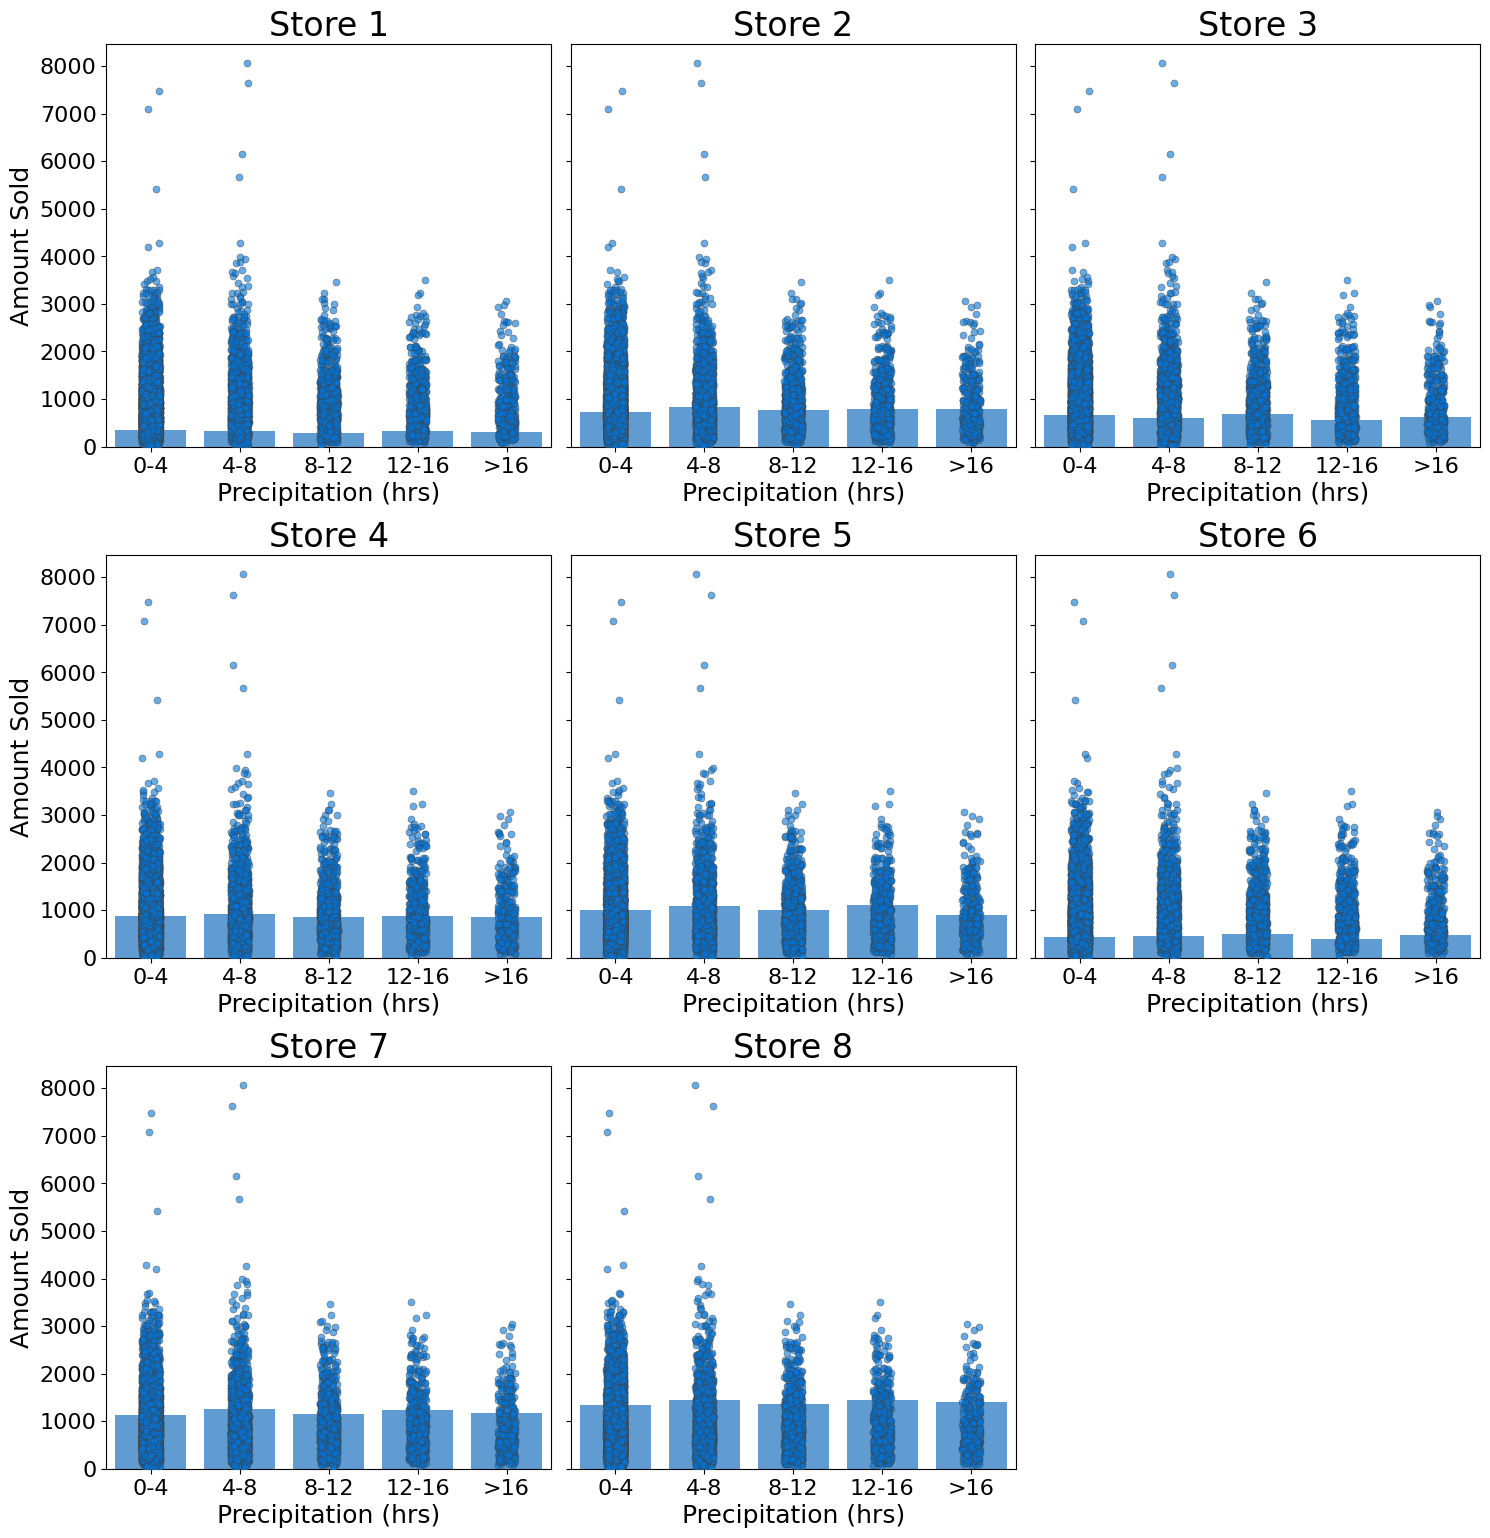

In [19]:
vis_rain_bin(d)

In [20]:
anova_pvalue(d, "rainfall_bins", "total_amount")

rainfall_bins 

Altona:  0.589
Danziger:  0.002
Jungfernstieg:  0.061
Maybachufer:  0.145
Mitte:  0.017
Neuer Kamp:  0.338
Potsdamer:  0.029
Warschauer:  0.128


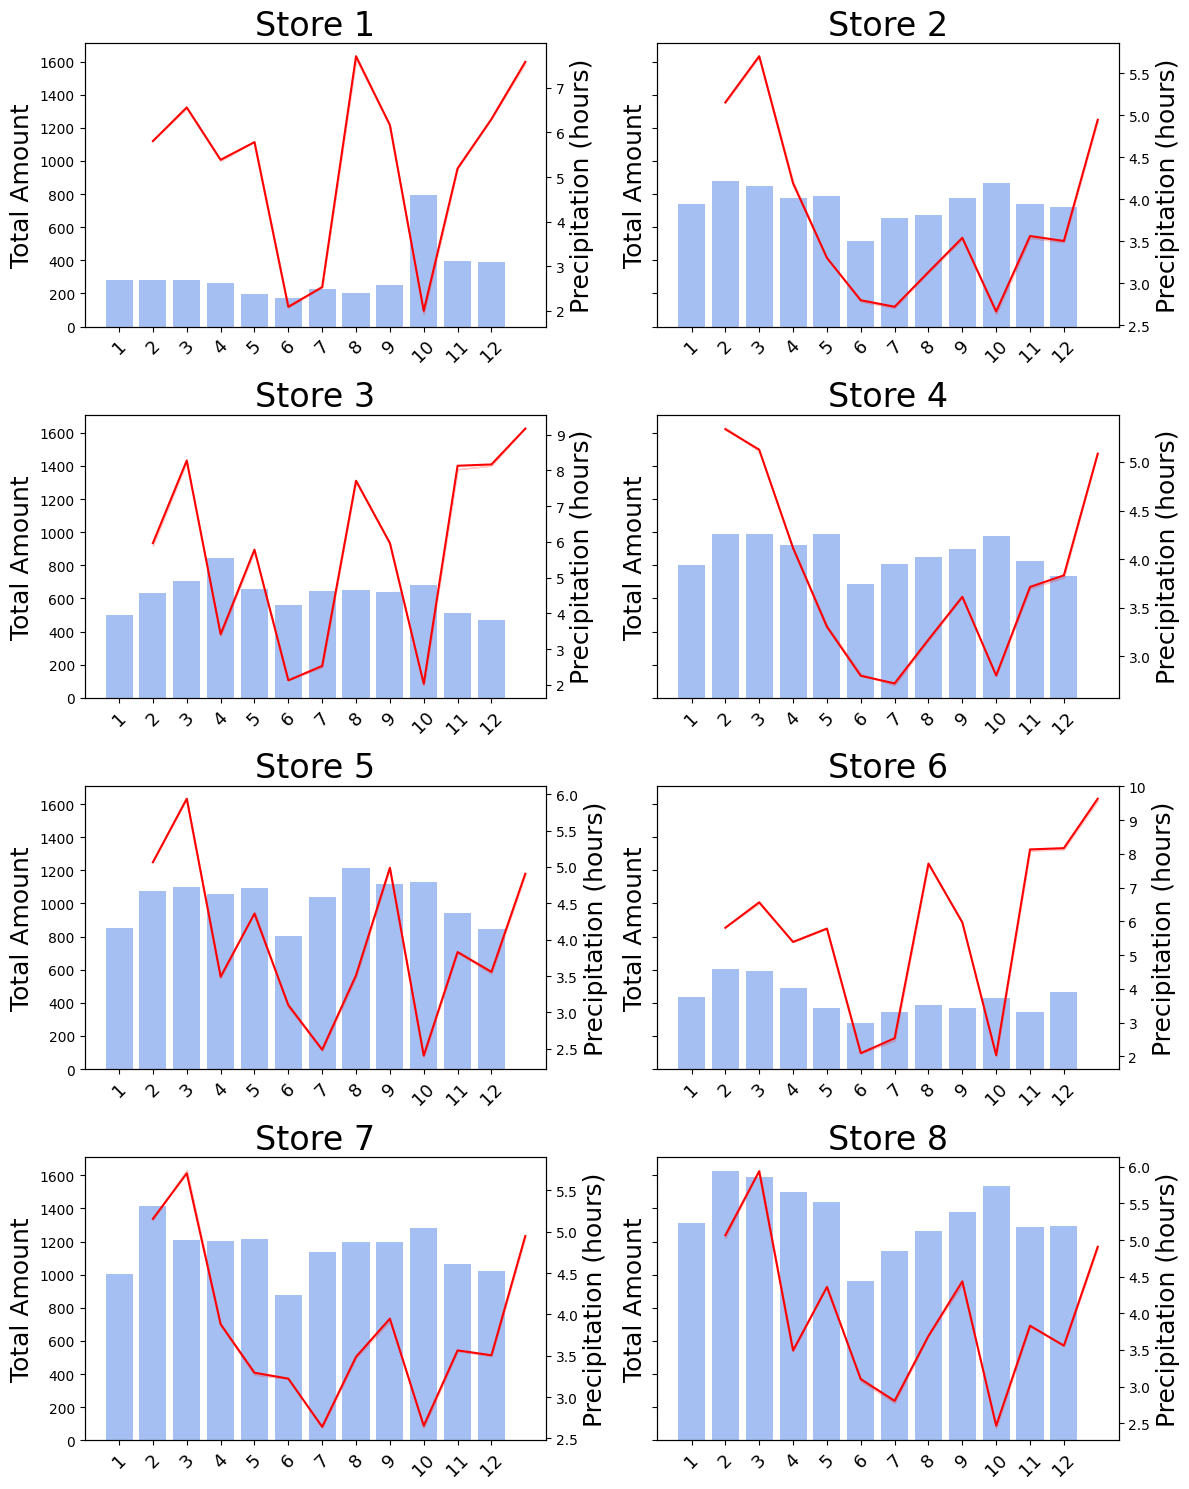

In [21]:
rainfall_month_sales(d)

By binning the rainfall variable into 5 distinct ordinal categories, the relationship between precipitation and sales became slightly more evident. It is, however, not always very intuitive, as average daily sales are in some cases lower when it rains less than when it rains a lot. This might be potentially explained by the fact that there isn't a lot of precipitation during summer and, as was seen above, sales tend to be lower then. The graph above shows this more clearly. The red line represents precipitation, while the bars show daily sales. That there is in fact a difference between precipitation categories and their effect on sales is further evidenced by lower p-values for certain stores.

Although not as clear cut at first, further investigation revealed that there is enough evidence to suggest that precipitation could influence sales. It should therefore be included in the sales forecasting model as a predictor variable.

### Temperature

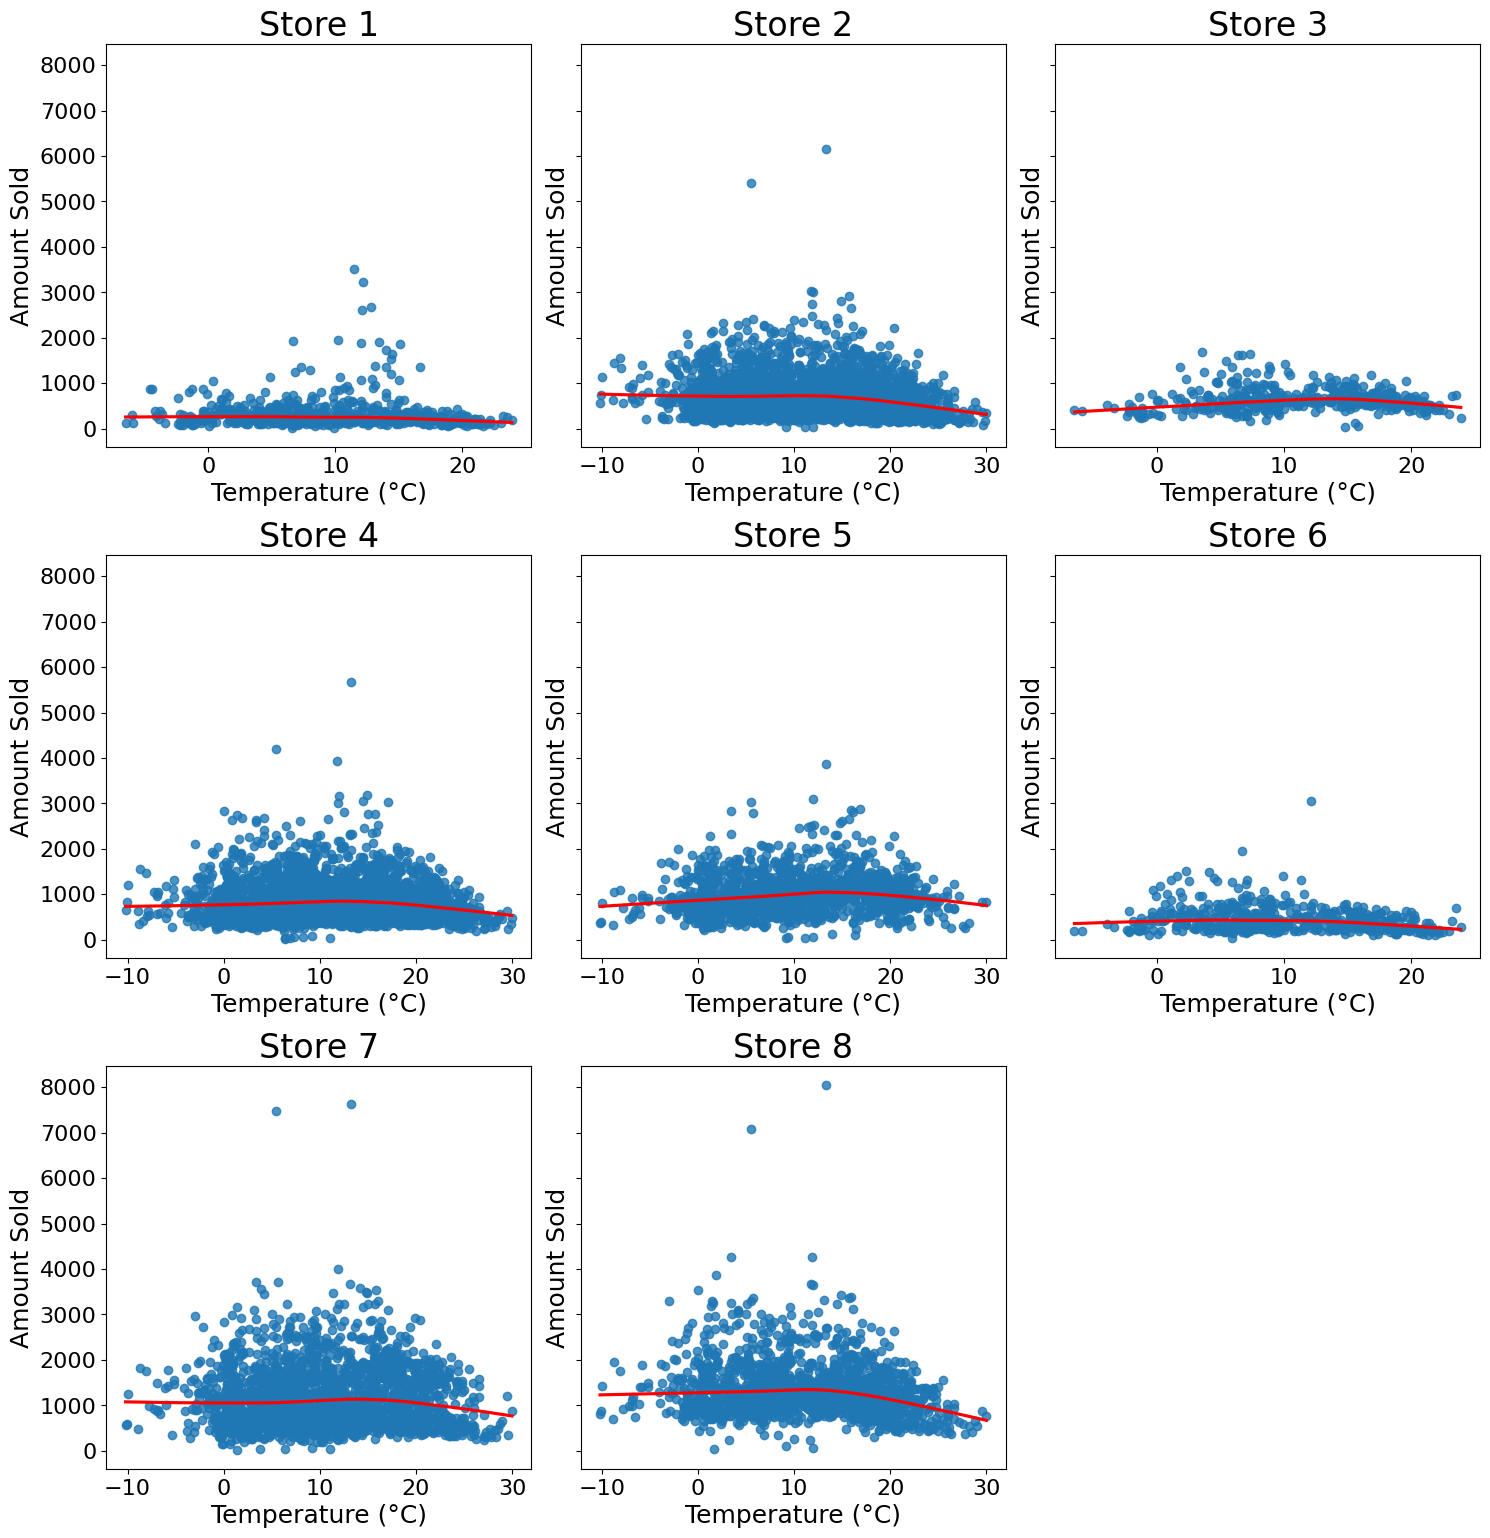

In [22]:
vis_temp(d)

In [23]:
corr_total_amount_by_store(d, "temperature_2m_mean")

temperature_2m_mean 

Altona:  -0.04
Danziger:  -0.14
Jungfernstieg:  0.01
Maybachufer:  -0.06
Mitte:  0.08
Neuer Kamp:  -0.21
Potsdamer:  -0.02
Warschauer:  -0.16


Similarly to precipitation, the relationship between temperature and donut sales does not seem to be strong at first glance. However, a non-linear effect can be observed in the graphs. Sales are highest when the temperature is around 15°C, and taper off when it gets warmer. Reiterating the points from above, this may have to do with the fact that either competing products, such as ice cream, become available during warmer days, or warmer days correlate with people leaving for summer holidays. Regardless of the cause, a non-linear correlation seems to be at work here.

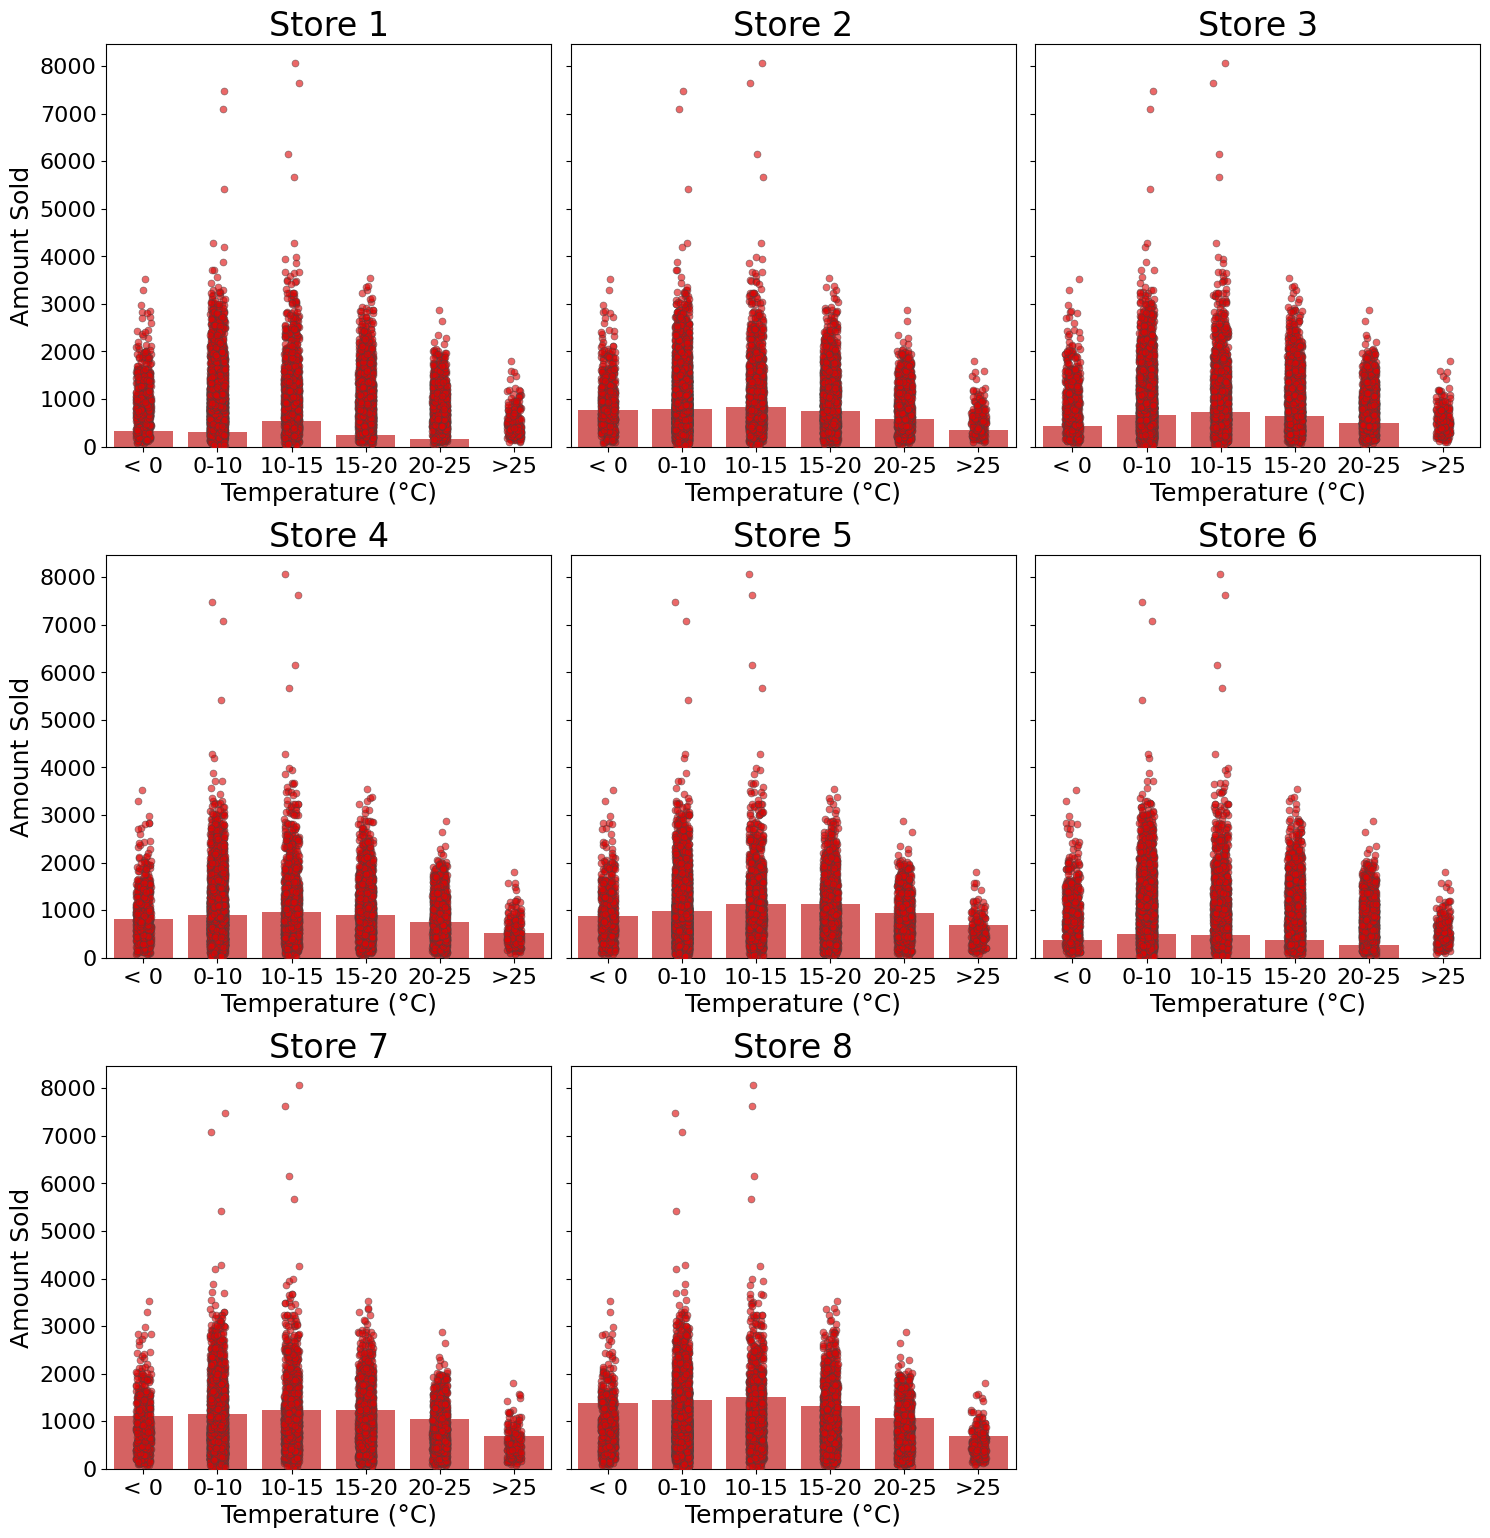

In [24]:
vis_temp_bin(d)

In [18]:
d[d["item_category"] == "daily total"].groupby("temp_bins")["total_amount"].mean()

temp_bins
0 - 10°C      934.429633
10 - 15°C    1015.380783
15 - 20°C     933.690048
20 - 25°C     799.769231
< 0°C         884.084320
> 25°C        540.179104
Name: total_amount, dtype: float64

In [25]:
anova_pvalue(d, "temp_bins", "total_amount")

temp_bins 

Altona:  0.0
Danziger:  0.0
Jungfernstieg:  0.0
Maybachufer:  0.0
Mitte:  0.0
Neuer Kamp:  0.0
Potsdamer:  0.0
Warschauer:  0.0


The binned temperature variable displays the non-linearity at play even further. This is further corroborated by very low p-values when examining the relationship between categorical temperature and sales. Across all stores, sales are highest when the temperature is between 10-15°C and lower when it's colder and warmer than that. Either the binned temperature or continuous temperature variable should therefore be included in the forecasting model.

Taking a look at the graphs below, the seasonal sales trend throughout the year can be at least partially explained by higher temperatures in the summer, which lead to a dip in sales.

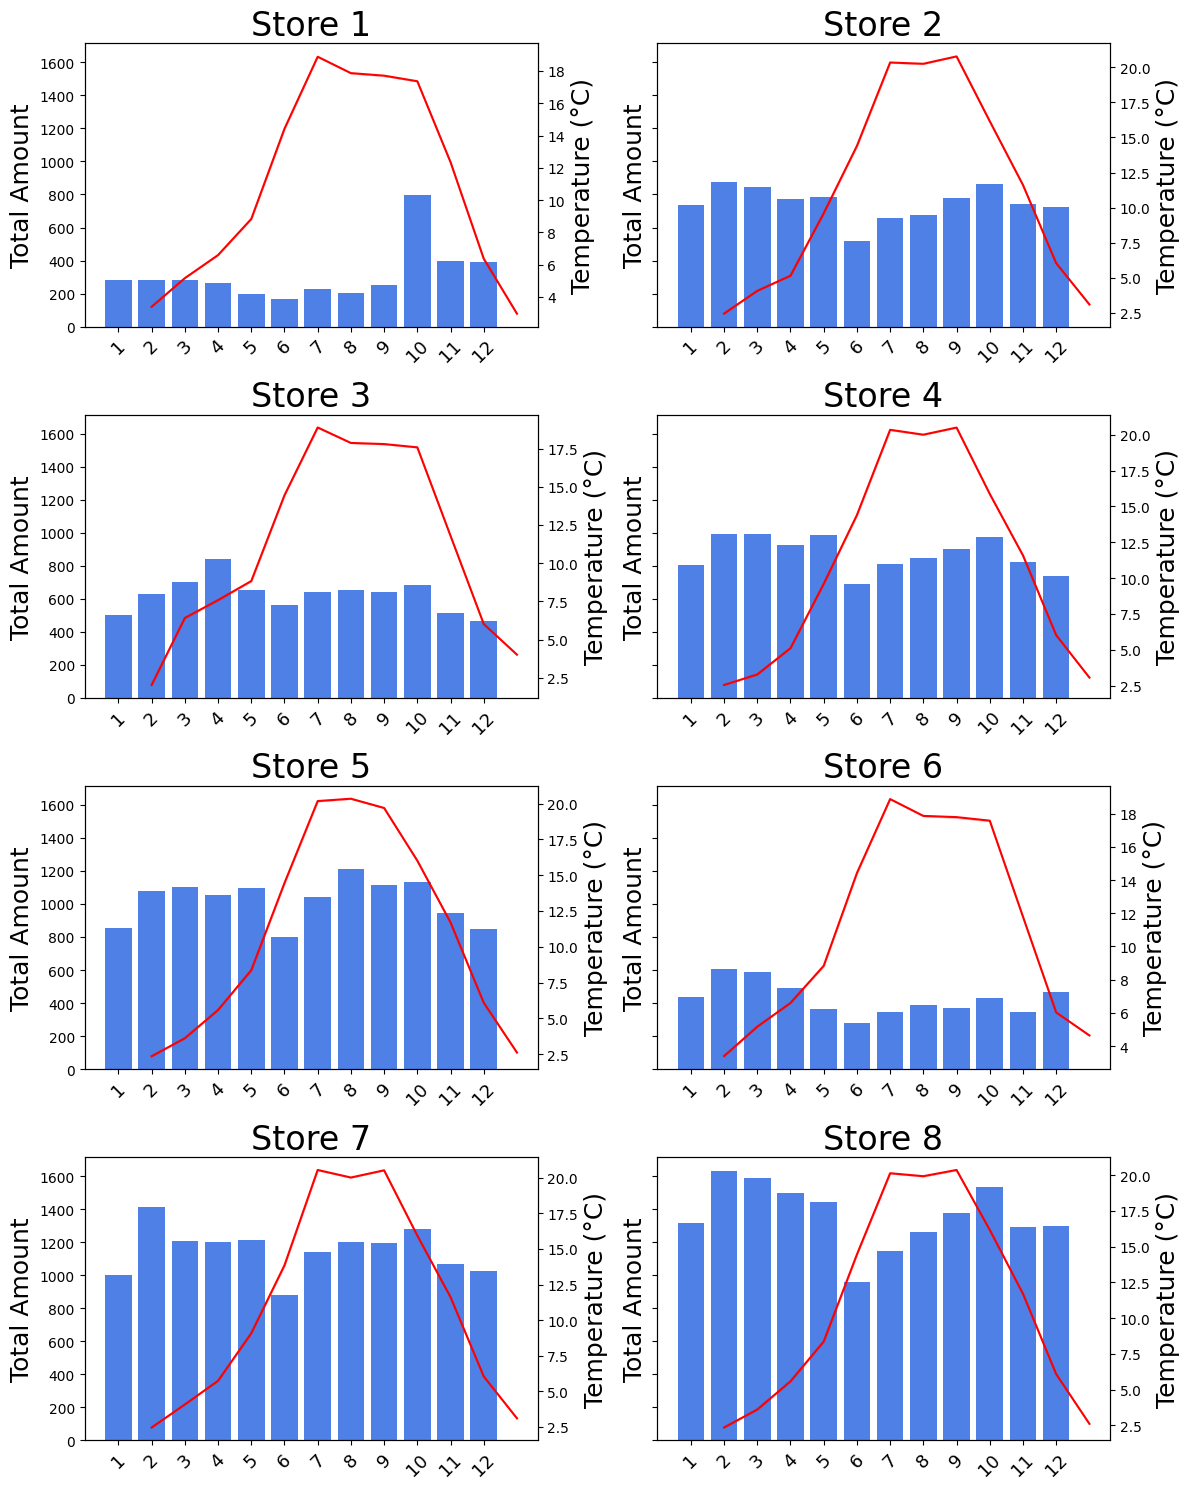

In [26]:
temp_month_sales(d)

### Sunshine duration

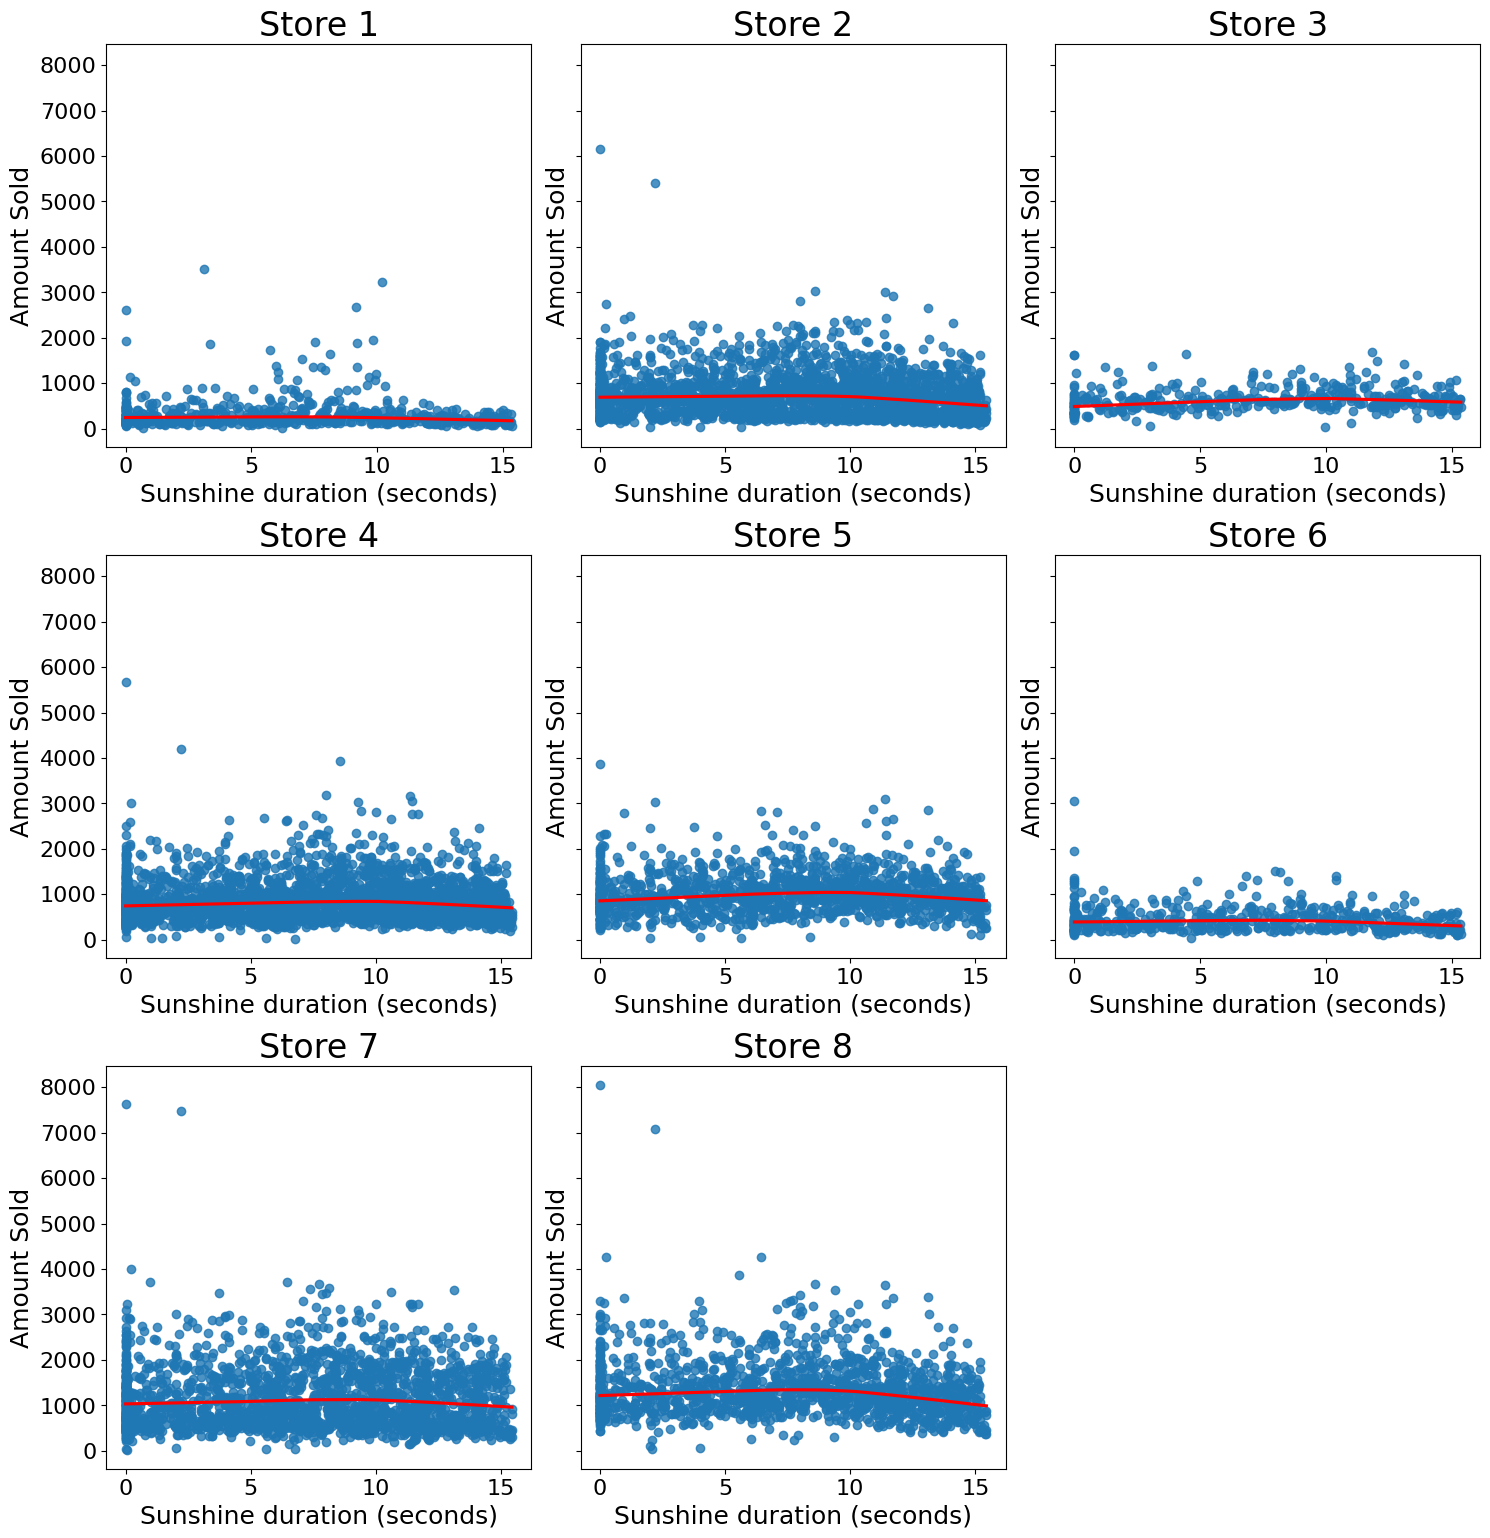

In [27]:
vis_sunshine(d)

In [28]:
corr_total_amount_by_store(d, "sunshine_duration")

sunshine_duration 

Altona:  -0.08
Danziger:  -0.1
Jungfernstieg:  0.14
Maybachufer:  -0.0
Mitte:  0.05
Neuer Kamp:  -0.14
Potsdamer:  -0.02
Warschauer:  -0.11


In [29]:
# Correlation between sunshine duration and temperature

np.corrcoef(d["temperature_2m_mean"], d["sunshine_duration"])[1][0]

0.6183627025462913

Similarly to the correlation between temperature and sales, sunshine duration does not seem to be associated with daily sales, yet exerts a slight non-linear effect. Because sushine duration is correlated with temperature (0.62), similar relationships are to be expected.

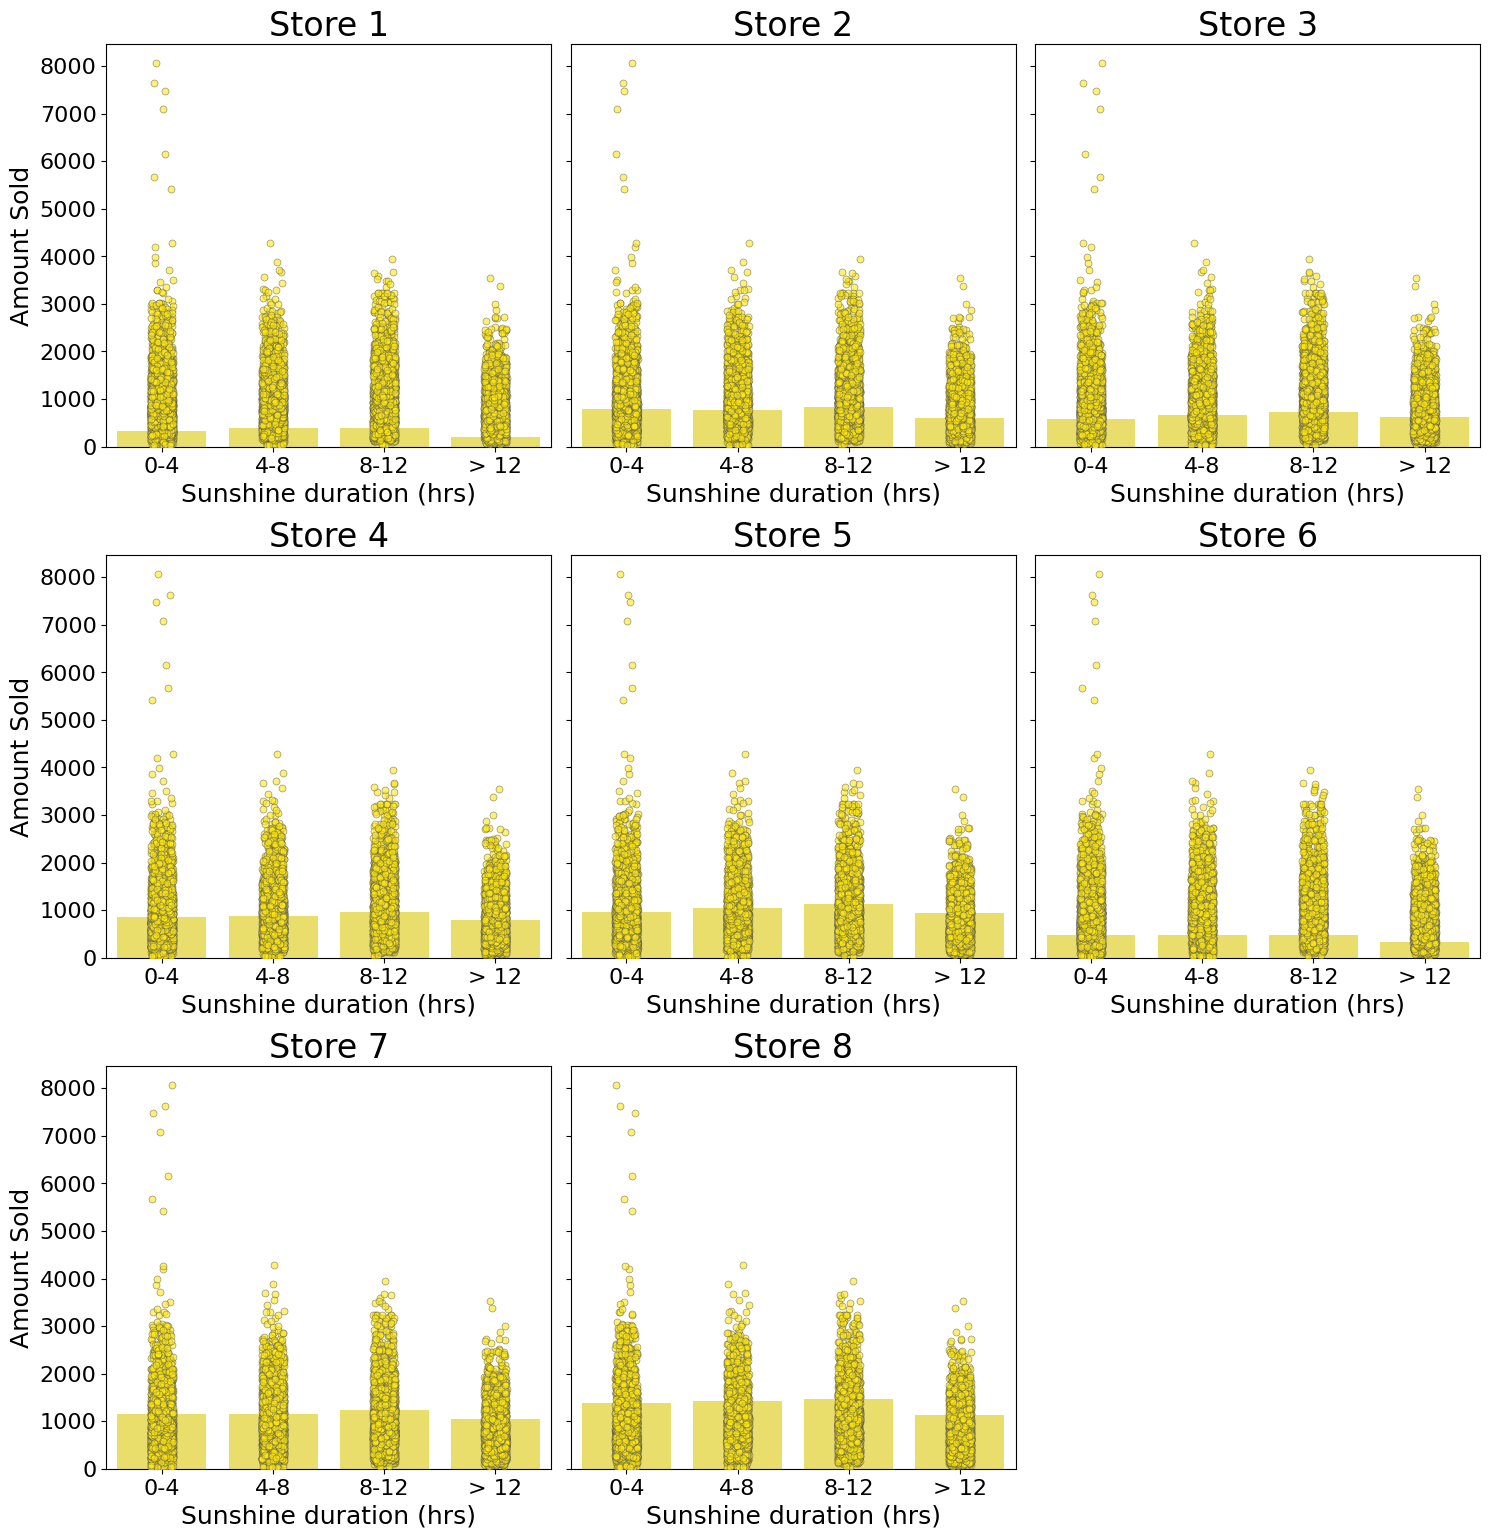

In [30]:
vis_sunshine_bin(d)

In [31]:
anova_pvalue(d, "sunshine_bins", "total_amount")

sunshine_bins 

Altona:  0.0
Danziger:  0.0
Jungfernstieg:  0.0
Maybachufer:  0.0
Mitte:  0.0
Neuer Kamp:  0.0
Potsdamer:  0.001
Warschauer:  0.0


Days with a sunshine duration of over twelve hours have the lowest sales. Again, this can most likely be explained by the fact the summers have a lot of sunshine, higher temperatures and, as was seen above, lower sales. The Anova p-values attest to an association between sunshine duration and sales. 

Because there is a relationship between sunshine duration and sales, it will be included in the forecasting model. Even if it this association can be largely explained by temperature, the two variables are not overly collinear (r = 0.62). The effect of sunshine on sales might still exist beyond what temperature can explain.

## Holidays

### Public holidays

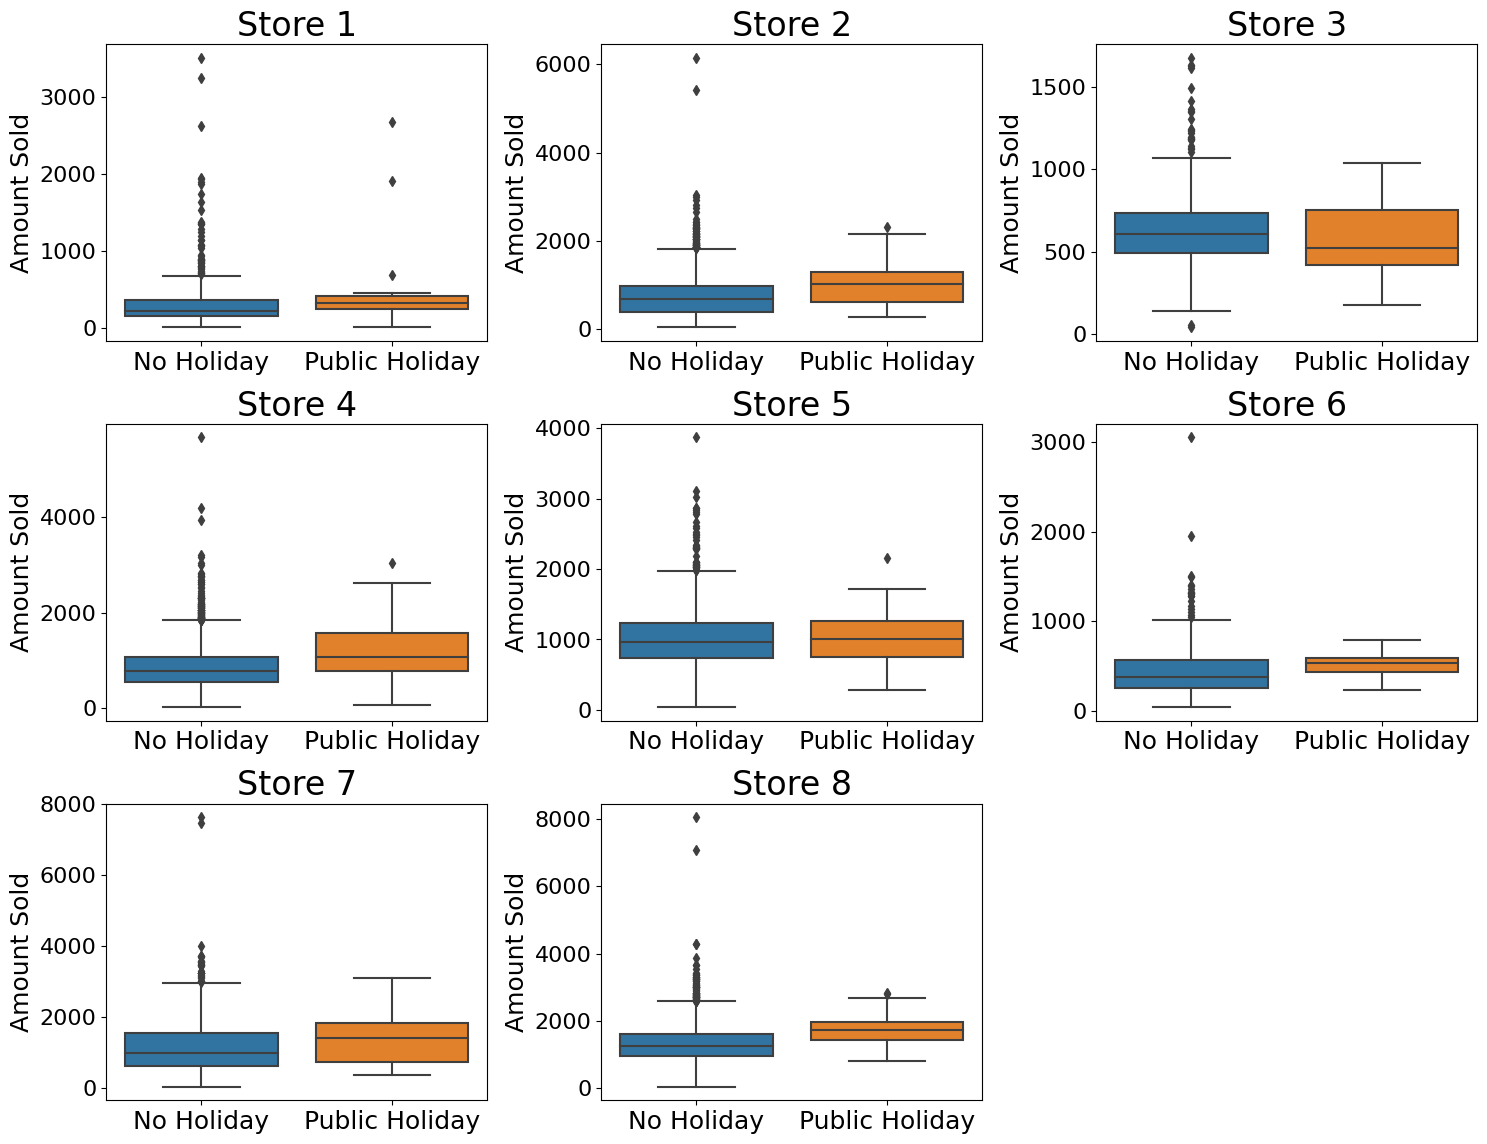

In [32]:
vis_pub_hol(d)

In [33]:
anova_pvalue(d, "hol_pub", "total_amount")

hol_pub 

Altona:  0.015
Danziger:  0.0
Jungfernstieg:  0.381
Maybachufer:  0.0
Mitte:  0.63
Neuer Kamp:  0.287
Potsdamer:  0.005
Warschauer:  0.0


A relationship between public holidays and daily sales seems to exist for most store locations. However, this association can generally not be established for stores that have opened relatively recently. Nonetheless, the Anova p-values hint at statistically significant differences of sales between public holidays and regular days. This variable will therefore be included in the forecasting model.

### School holidays

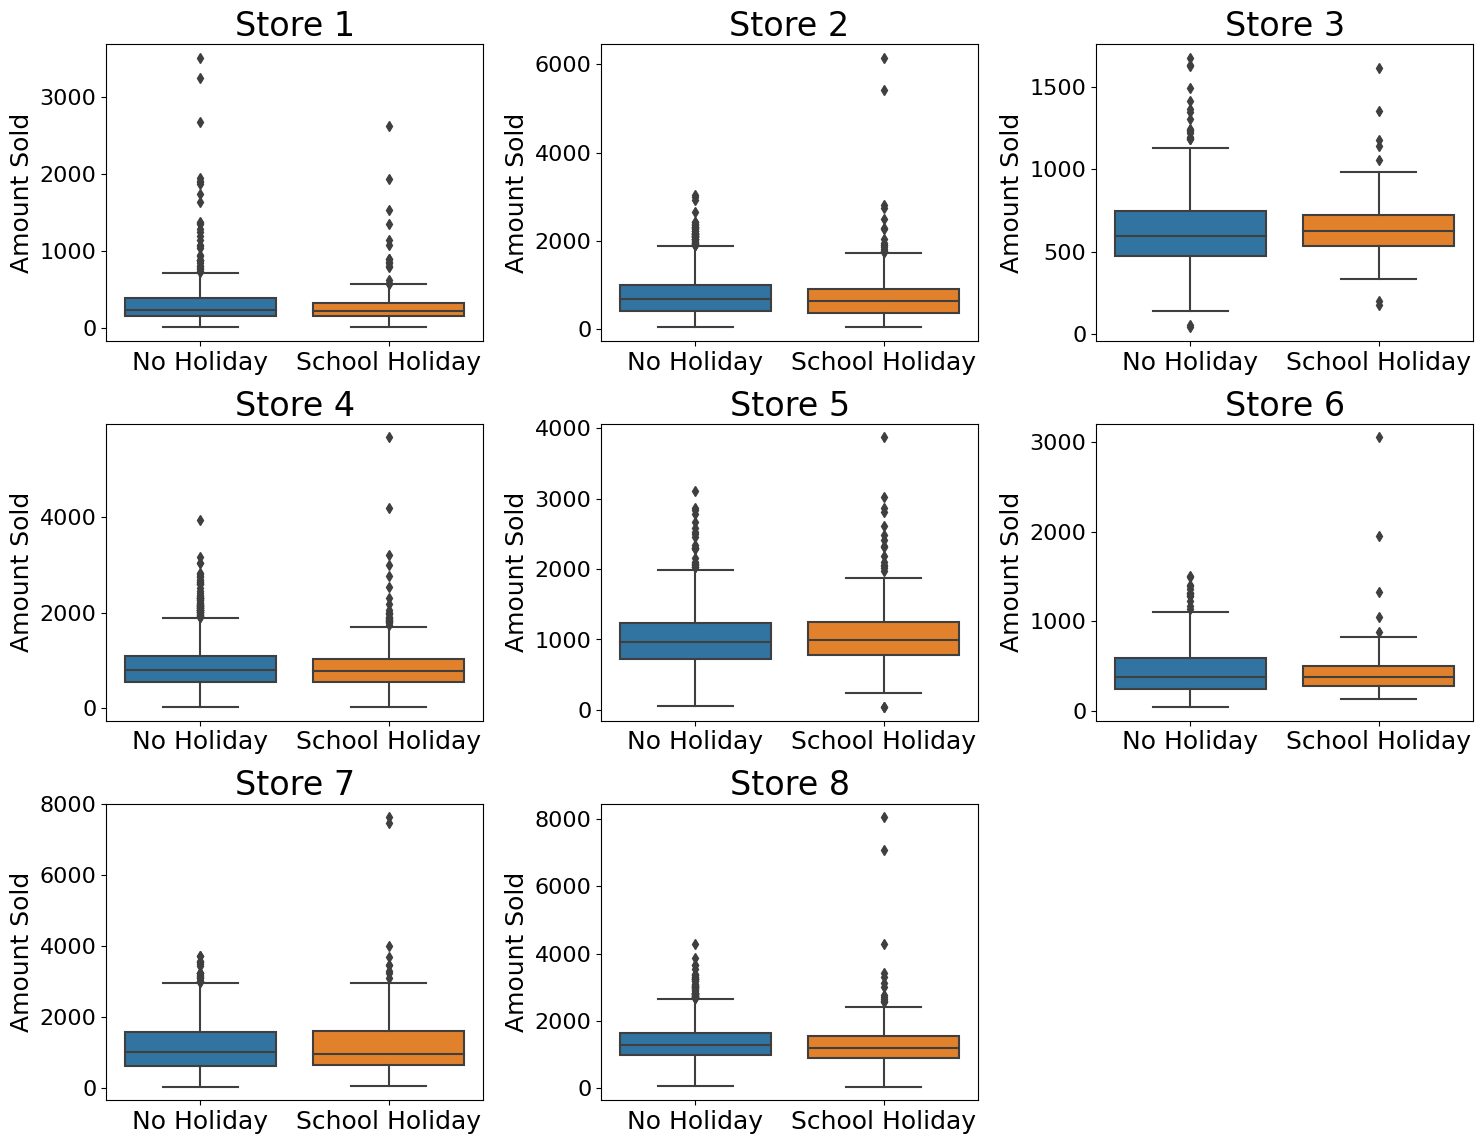

In [34]:
vis_school_hol(d)

In [35]:
anova_pvalue(d, "hol_school", "total_amount")

hol_school 

Altona:  0.884
Danziger:  0.047
Jungfernstieg:  0.581
Maybachufer:  0.314
Mitte:  0.071
Neuer Kamp:  0.931
Potsdamer:  0.329
Warschauer:  0.057


Overall, sales don't seem to be very different during school holidays compared to regular days. Still, there are some store location with relatively low Anova p-values. It might therefore make sense to include this variable in tree-based models, but exclude it from a linear regression model.

## Public Spaces

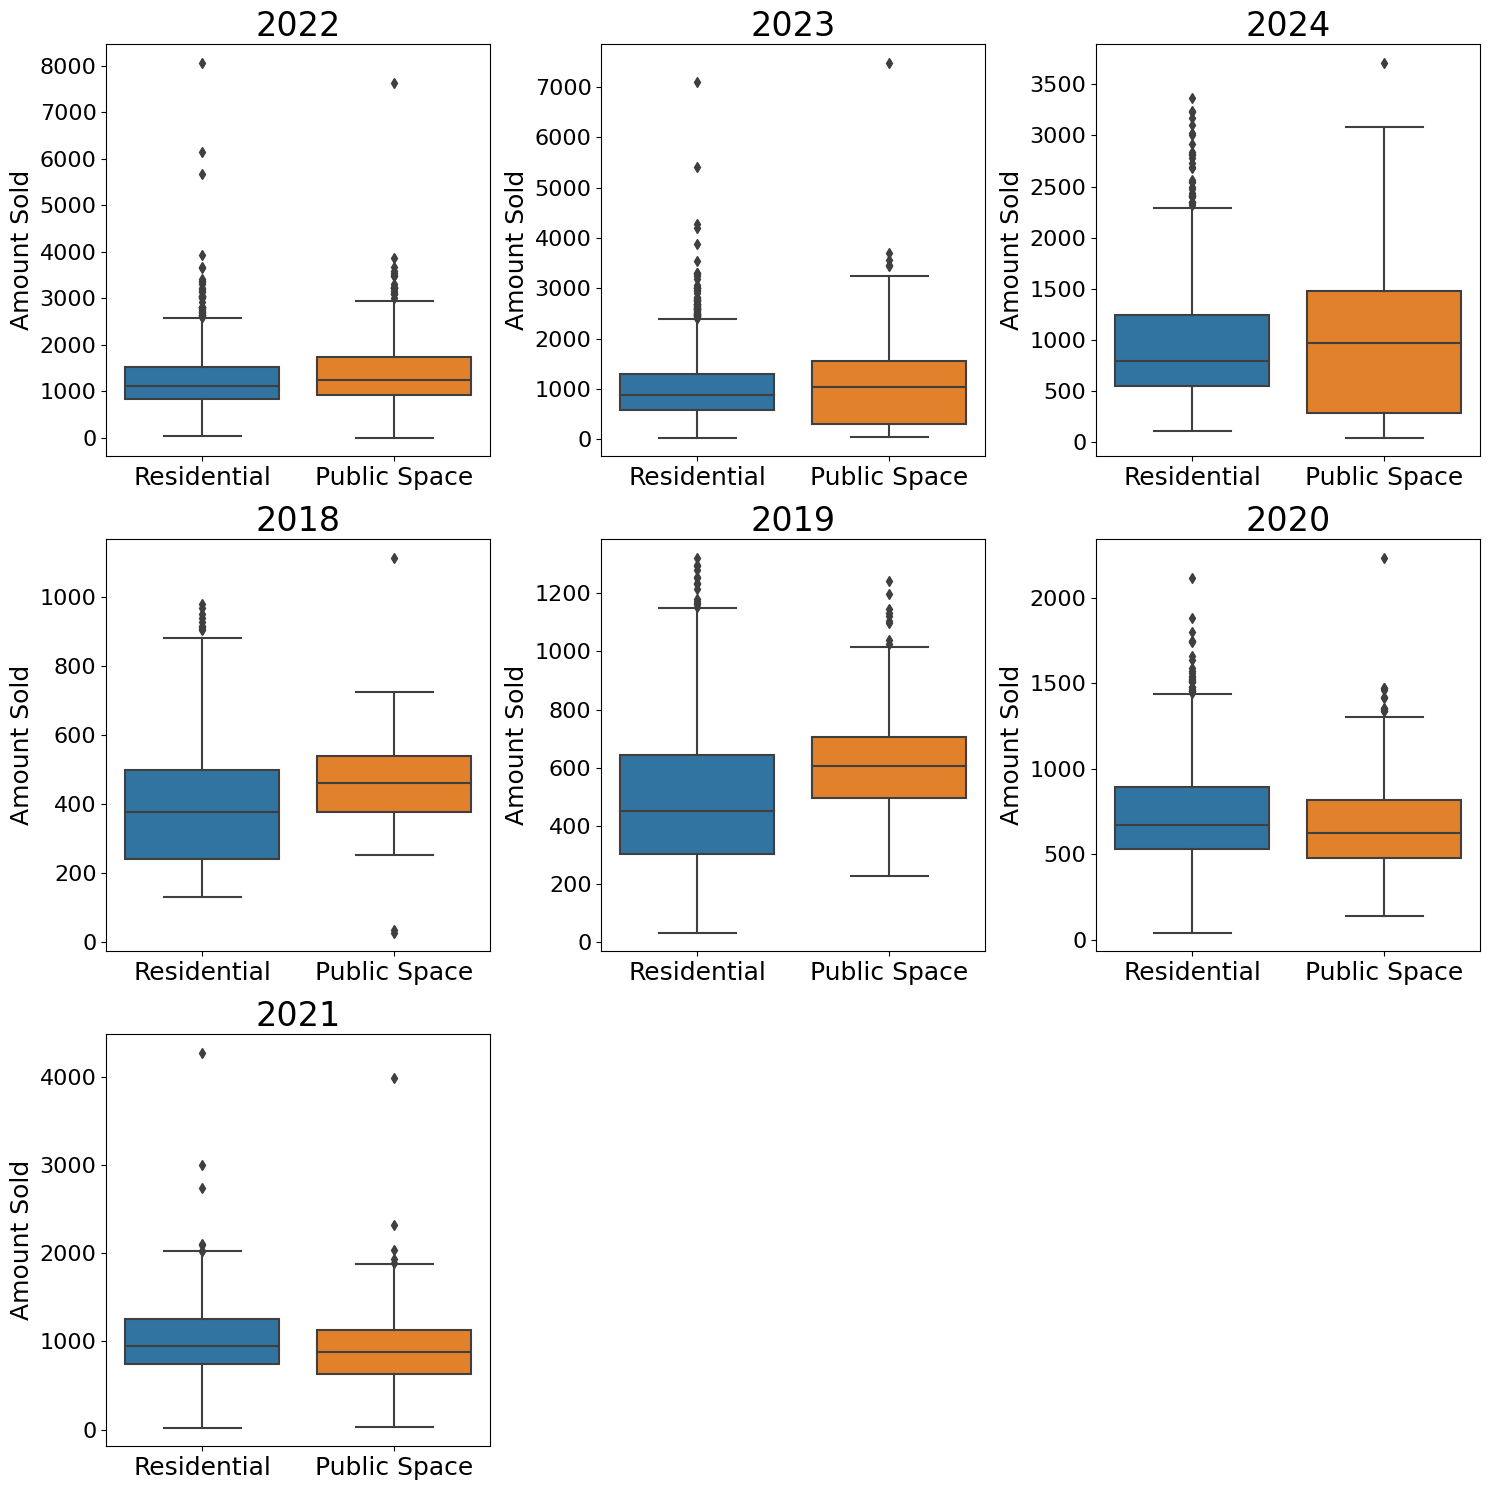

In [36]:
vis_pub_spaces(d)

In [31]:
anova_pvalue_allstores(d, "public_space", "total_amount")

public_space 

0.0


While the relationship was reversed during the COVID-pandemic, stores in more touristic, "public" spaces generally tend to sell more donuts. The low p-Value attests to that. This variable will therefore be included in the model.

## Time variables

### Weeks of the year

S:\Repos\sweet-spot-donut-sales-forecasting\functions_vis.py:675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data["special_events"] = store_data.apply(lambda x: True if x["nye"] == 1 or x["valentines_day"] == 1 or x["halloween"] == 1 else False, axis = 1)
S:\Repos\sweet-spot-donut-sales-forecasting\functions_vis.py:675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data["special_events"] = store_data.apply(lambda x: True if x["nye"] == 1 or x["valentines_day"] == 1 or x["halloween"] == 1 else

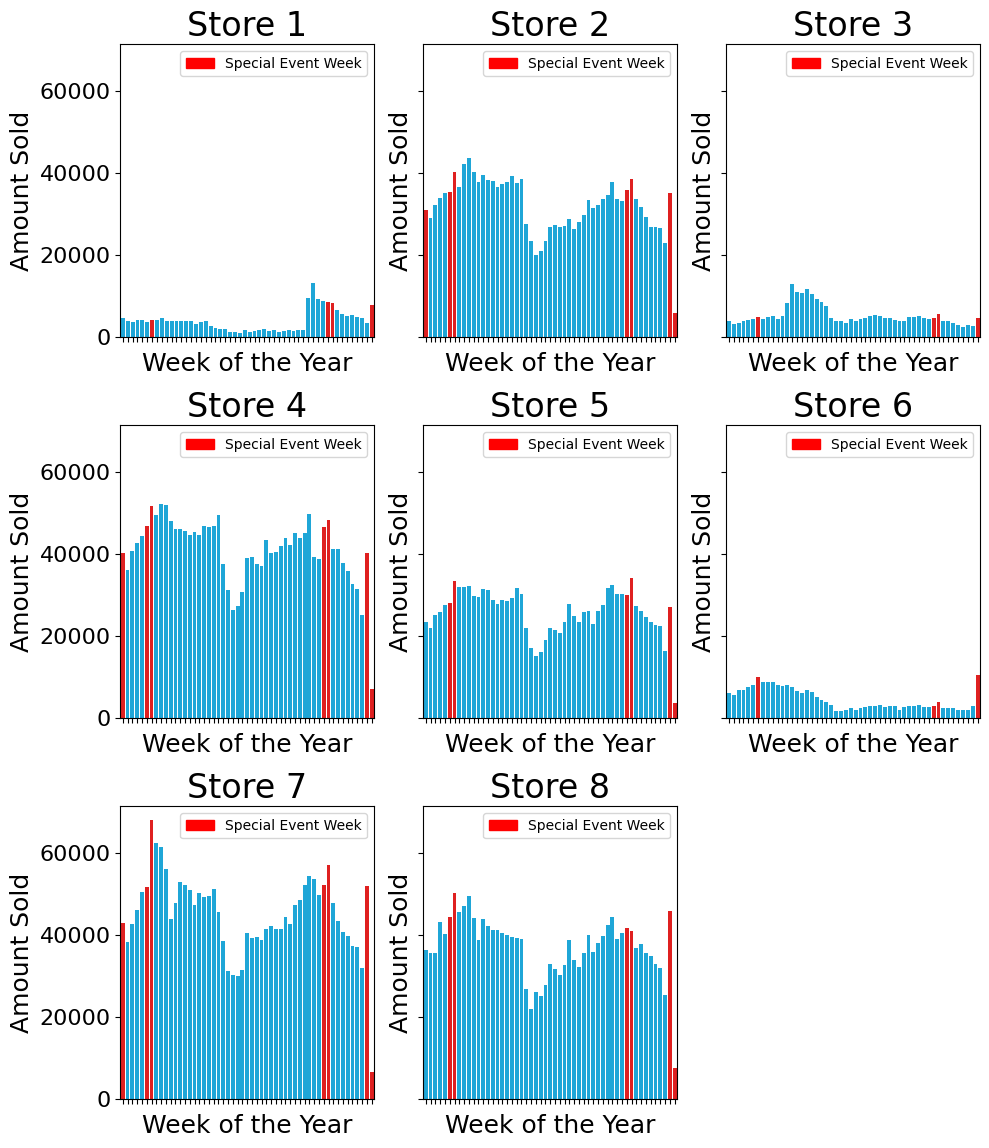

In [37]:
vis_weeks(d)

**Anova p-value for week of the year and daily sales**

In [38]:
anova_pvalue(d, "week_year", "total_amount")

week_year 

Altona:  0.0
Danziger:  0.0
Jungfernstieg:  0.0
Maybachufer:  0.0
Mitte:  0.0
Neuer Kamp:  0.0
Potsdamer:  0.0
Warschauer:  0.0


**Anova p-value for NYE and daily sales**

In [39]:
anova_pvalue(d, "nye", "total_amount")

nye 

Altona:  0.0
Danziger:  0.0
Jungfernstieg:  0.0
Maybachufer:  0.0
Mitte:  0.0
Neuer Kamp:  0.0
Potsdamer:  0.0
Warschauer:  0.0


**Anova p-value for Valentine's Day and daily sales**

In [40]:
anova_pvalue(d, "valentines_day", "total_amount")

valentines_day 

Altona:  0.392
Danziger:  0.004
Jungfernstieg:  0.02
Maybachufer:  0.003
Mitte:  0.0
Neuer Kamp:  0.003
Potsdamer:  0.0
Warschauer:  0.0


**Anova p-value for Halloween and daily sales**

In [41]:
anova_pvalue(d, "halloween", "total_amount")

halloween 

Altona:  0.0
Danziger:  0.0
Jungfernstieg:  0.12
Maybachufer:  0.0
Mitte:  0.0
Neuer Kamp:  0.141
Potsdamer:  0.001
Warschauer:  0.0


The graphs above depict a trend that is by now already known: Sales during the summer tend to be very low. However, what is additionally evident is the fact that some weeks during which special events happen - New Year's Eve, Halloween and Valentine's Day - experience spikes in sales. This is especially true for NYE. 

The low p-Values - both for the relationship between weeks and, more importantly, between special event days and daily sales - show that including these variables in the model should substantially improve sales forecasts. The effect of the different weeks on daily sales can additionally capture seasonal trends at a more granular level than the inclusion of months would be able to. 

### Weekdays

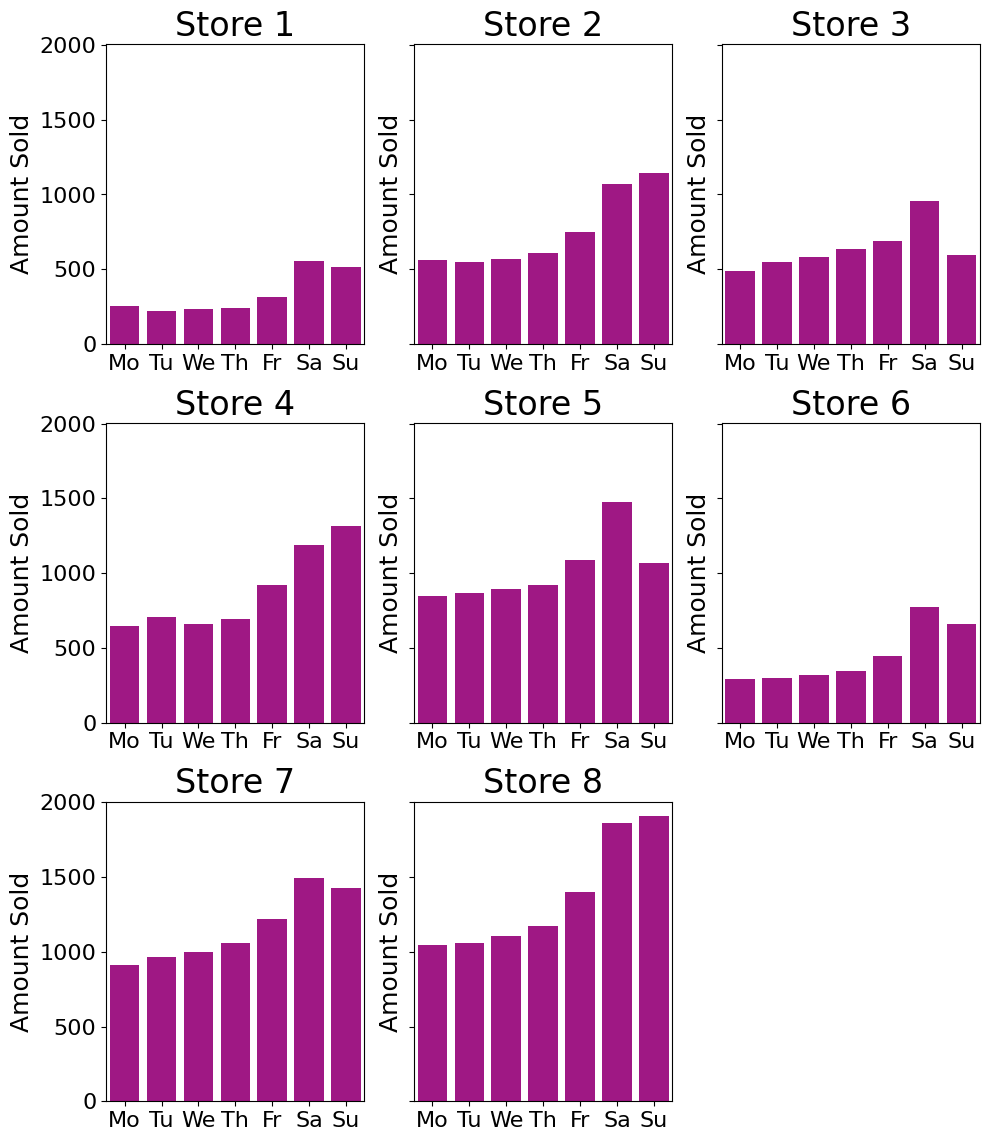

In [42]:
vis_weekday(d)

In [43]:
anova_pvalue(d, "weekday", "total_amount")

weekday 

Altona:  0.0
Danziger:  0.0
Jungfernstieg:  0.0
Maybachufer:  0.0
Mitte:  0.0
Neuer Kamp:  0.0
Potsdamer:  0.0
Warschauer:  0.0


In a typical week, sales tend to be highest on Saturday, Sunday and, to a lesser degree, on Friday across all stores. This hints at the influence of these weekdays on customer behaviour, which intuitively makes sense. People typically have more time on the weekend and sometimes on a Friday, which increases the chance of them going shopping. This applies not only to residents but also tourists who may be visiting on a weekend. The association between weekdays and sales is further evidenced by extremely low Anova p-Values. This variable will therefore be included in the forecasting model.

### Weekend

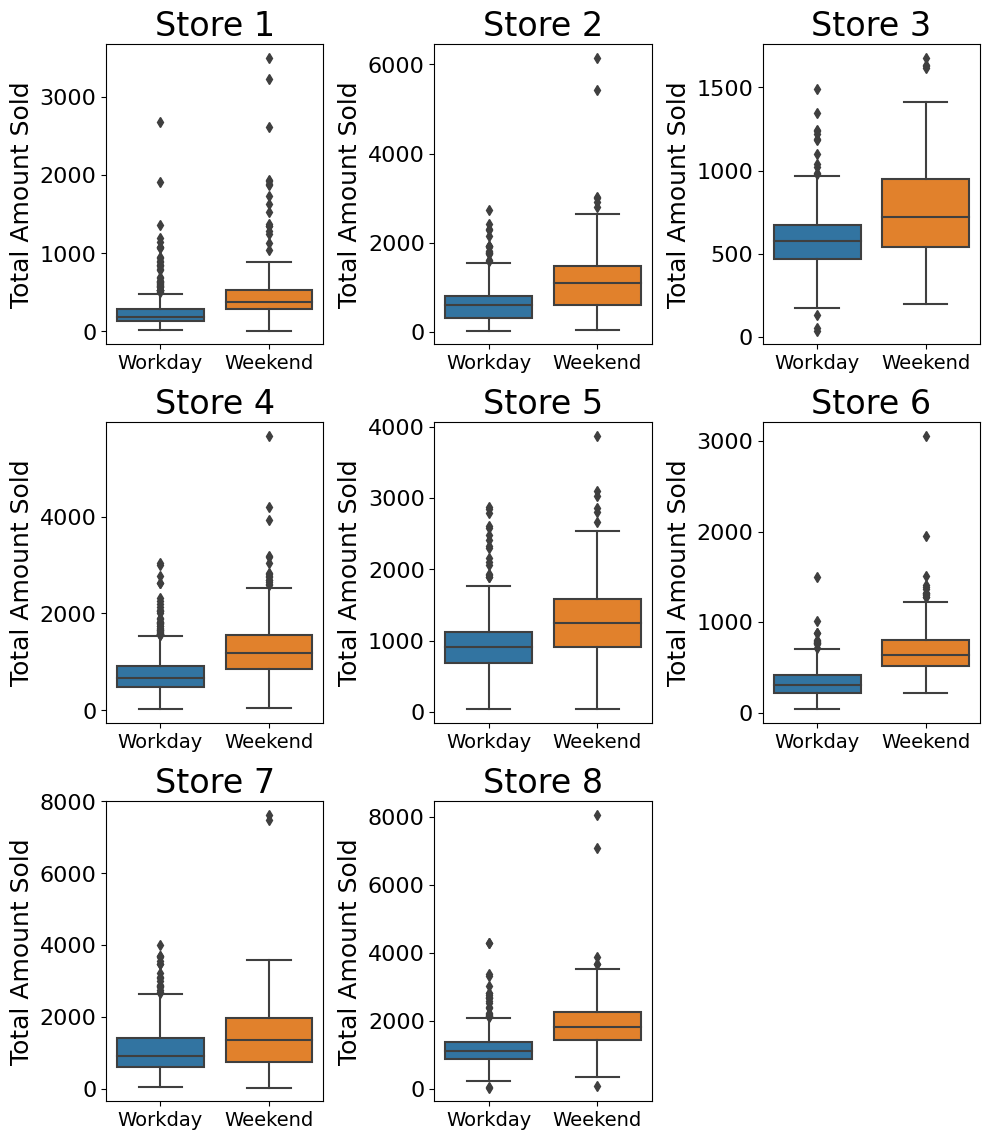

In [44]:
vis_weekend(d)

In [45]:
anova_pvalue(d, "weekend", "total_amount")

weekend 

Altona:  0.0
Danziger:  0.0
Jungfernstieg:  0.0
Maybachufer:  0.0
Mitte:  0.0
Neuer Kamp:  0.0
Potsdamer:  0.0
Warschauer:  0.0


Further corroborating the point from above, sales on only weekends tend to be much higher than during a workday. This can be clearly observed in the boxplots and is further strenghtend by very low p-values.

### Item Categories

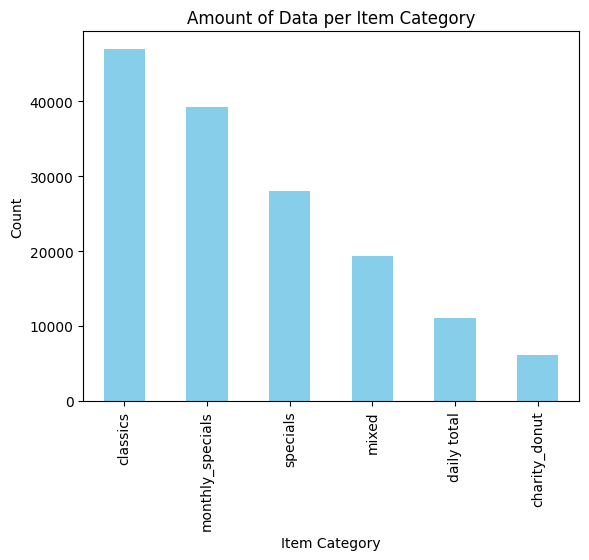

In [98]:
d['item_category'].value_counts().plot(kind='bar', color='skyblue')


# Add labels and title
plt.title('Amount of Data per Item Category')
plt.xlabel('Item Category')
plt.ylabel('Count')

# Show plot
plt.show()

Because customers tastes vary, it is important to measure how individual donut types impact sales. As can be seen in the plot below, the "mixed" category seems to be driving a large portion of sales. The difference in categories is true for all stores, as the low p-values can confirm. Item categories will therefore be included in the forecasting model.

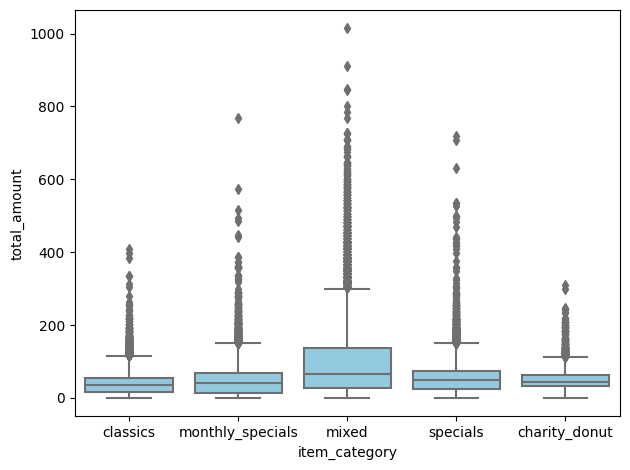

In [109]:
sns.boxplot(data = d[d["item_category"] != "daily total"], x = "item_category", y = "total_amount", color="skyblue")
plt.tight_layout()

In [47]:
def anova_pvalue(df,cat_col,num_col):
    """
    This function spits out the anova p-value (probability of no correlation) 
    between a categorical column and a numerical column of a dataframe
    """
    print(cat_col, "\n")
    #df = df[df["item_category"] == "daily total"]
    for store in df["store_name"].unique():
        store_data = df[df["store_name"] == store]
        if isinstance(cat_col, int) or isinstance(cat_col, float):
            store_data = store_data.groupby("date").agg({cat_col:"mean", "total_amount":"sum"})
        else:
            store_data = store_data.groupby(["date",cat_col]).agg({"total_amount":"sum"}).reset_index()
        CategoryGroupLists = store_data.groupby(cat_col)[num_col].apply(list)
        AnovaResults = ss.f_oneway(*CategoryGroupLists)
        p_value = round(AnovaResults[1],3)
        print(store + ": ", p_value)

In [48]:
anova_pvalue(d, "item_category", "total_amount")

item_category 

Altona:  0.0
Danziger:  0.0
Jungfernstieg:  0.0
Maybachufer:  0.0
Mitte:  0.0
Neuer Kamp:  0.0
Potsdamer:  0.0
Warschauer:  0.0
